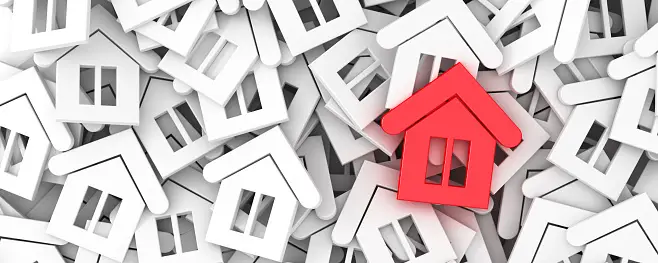
- Part 0:  [Project Introduction](#1)
- Part 1:  [Exploratory Data Analysis (EDA)](#2)   
  - 1.1  [Import Files and Load Data](#3)
  - 1.2  [Basic Data Inspectations](#4)
  - 1.3  [Deeper EDA, Data Cleaning](#5)
    - 1.3.1 [Missing Values](#6)
    - 1.3.2 [Dependent Variable Distribution](#7)
    - 1.3.3 [Datetime Features](#8)
    - 1.3.4 [Discrete and Continuous Features](#9)
    - 1.3.5 [Data Visualization and Analysis](#10)
- Part 2:  [Data preprocessing](#11)
  - 2.1 [Fill in Missing Values](#12)
  - 2.2 [Creat New Features](#13)
  - 2.2 [Categorical Feature Encoding](#14)
  - 2.3 [Features and Dependent Variable Log Transformation](#15)
  - 2.4 [Remove Outliers](#16)
  - 2.5 [Final data touch-ups](#17)
- Part 3: [Model Building and Training](#18)
  - 3.1 [Base Line Model - Linear Regression without regularizations ](#19)
  - 3.2 [Model Tuning - Linear Regression with Lasso and Ridge regularizations](#20)
  - 3.3 [Model Tuning - Tree models (Decision Tree, Random Forest, Gradient Boost, XGBoost)](#21)
  - 3.4 [Feature Coefficients and Feature Importances](#22)
  - 3.5 [Ensemble Method - Model Stacking](#23) 
- Part 4: [Submit Testing Results](#24)
- Part 5: [Conclusion](#25)
- [References](#26)

Photo by [JuSun](https://www.istockphoto.com/portfolio/JuSun?mediatype=photography) from Unsplash.

# <a id="1"></a>
<div style="text-align: center; background-color: #544e70; font-size:80%; font-family: Comic Sans MS; padding: 5px;border-radius:10px 10px; color: white;"> 
    <h1>Part 0: Project Introduction 🌻</h1>

</div>

<div style="background-color: #ECECEA; padding: 10px;">
<span style="font-size: larger;">

### Dataset Overview 🧩
- The dataset originates from a Kaggle competition project. As mentioned in the [dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) and [project](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview) description, the reowned Ames Housing dataset was first compiled by Dean De Cock for data science education. The dataset provides comprehensive insights into residential properties in Ames, encompassing diverse features such as the size of the property, its location, the year it was built, and numerous other descriptors. With this rich array of information. The dataset aims to uncover patterns and relationships that influence house prices, ultimately enabling us to develop robust predictive models. Welcome to our project focused on predicting house prices in Ames, Iowa, utilizing the renowned Ames Housing dataset.


### Project Goals, metric and focus 🎯
- Project goal: For each Id in the test set, predict the value of the SalePrice variable. For this Kaggle competition, submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.) I will just use this. 
- Beyond prediction: Our project also focuses on leveraging the richness of the dataset, which comprises 80 features. While linear models typically require extensive data cleaning and preprocessing, we view this dataset as an excellent opportunity to practice and demonstrate these essential steps in machine learning workflows. By meticulously preparing the data and exploring various preprocessing techniques, we aim to enhance the performance of our linear regression model and gain valuable insights into the factors influencing house prices in Ames.  



### Model Training Approach:🎳
- Initial Base Run: Initial focus will be on implementing a linear regression model as it provides a fundamental baseline for predicting house prices. At the heart of this approach lies thorough data exploration and preprocessing. 
- Tuning:
   - To enhance the performance of our linear regression model, we'll incorporate Lasso and Ridge regression to help mitigate overfitting.
   - Then, we'll explore the effectiveness of several tree-based models, such as random forests, gradient boosting machines, and XGBoost.
   - Grid-search will be performed to identify the optimal hyperparameters for the models.

- Ensemble method (model stacking):
  - As a final step, we'll employ model stacking techniques to aggregate the predictions of all our models to leverage the diverse perspectives of each model to make more accurate predictions.. 



<div style="background-color: #ECECEA; padding: 10px;">
<span style="font-size: larger;">

    
### Since linear regression is our main focus model, let's discuss about it's assumptions:🌳
Machine models requires us to make assumptions about the data we collect. If assumptions are not met, the predictions or explanatins come from the models will be suspect or the model won't work well. For linear regression (
$y_i = \beta_0 + \sum^p_{j=1}\beta_j x_{i,j} + \varepsilon_i$, for i = 1,...,n as number of observations and j=1,...,p as number of features), there are 4 basic assumptions. I order them by the most important to the least below:
- Linearity
  - Linear relationships between the dependent variable $y_is$ and the parameter values $\beta_js$ are linear.  
  - Note linear relationshipbetween dependent variable $y_is$ and the features $x_is$ aren't required. For example, $y_i$=$\beta_0 + \beta_1*sin(x_i)+\varepsilon_i$ still satisfies linearity because $sin(x_i)$ can be looked as a whole and $\beta_1$ still has a linear relationship with $y_is$
- Independence
  - Each dependent variable $y_is$ should be independent to each other. For instance, house prices should be independent to each other for this project.
- Homoskedasticity
  - Each dependent variable $y_is$ measurement is assumed to have the same variance. This is also called "same variance" assumption. We can also look this as residuals have the same varaince: $var(y_i$) = $\sigma^2 = var(\varepsilon_i)$
- Normality
  - The dependent variable measurement is normally distributed. That is, $y_i$ are independent and identically distributed with $\mathcal{N}(\beta_0 + \sum^p_{j=1}\beta_j x_{i,j}, \sigma^2)$. 
  - We can also look this as residual term normally distributed. That is, $\varepsilon_i$ are independent and identically distributed with $\mathcal{N}(0, \sigma^2)$
    
### Other important things for linear regression model
- Feature scaling
   - Linear regression uses gradient descent to find optimal fitting line so scaling is required
- Impact of missing values
   - Sensitive to missing values 
- Impact of outliers
    - Outliers have big impact on model performance (determine the slope) although regularization will help.
    

# <a id="2"></a>
<div style="text-align: center; background-color: #544e70; font-size:80%; font-family: Comic Sans MS; padding: 5px;border-radius:10px 10px; color: white;">
    <h1>Part 1: Exploratory Data Analysis (EDA) 🪁</h1>
</div>

##### <a id="3"></a>

<div style="text-align: center; background-color: #c1cbd7; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 1.1: Import Files and Load Data</h2>
</div>

In [1]:
#Load packages 
!pip install pydotplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import collections

from math import sqrt
from scipy import stats
from scipy.stats import norm, skew

from sklearn import preprocessing, tree
from sklearn.preprocessing import  OrdinalEncoder, LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, LassoLarsCV, Ridge, RidgeCV 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

import xgboost
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor

#Special display options
pd.set_option("display.max_columns", None) 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#Load data
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test= pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# <a id="4"></a>

<div style="text-align: center; background-color: #c1cbd7; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 1.2: Basic data inspectations</h2>
</div>


In this section, I will perform some quick basic data inspections. This step is a standard procedure for all my projects and remains relatively consistent. However, it's a crucial step to ensure that the data has been loaded correctly, gain a basic understanding of the data, and establish goals for the next steps in the exploratory data analysis (EDA) process.

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
#Find out number of rows & columns in data
print ('Training set Number of (rows,columns): ' + str(train.shape) )
print ('Testing set Number of (rows,columns): ' + str(test.shape))

Training set Number of (rows,columns): (1460, 81)
Testing set Number of (rows,columns): (1459, 80)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Check some statistics properties of training data for numerical features
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

<div style="background-color: #cecec0; padding: 10px;">
<span style="font-size: larger;">

    
### Basic EDA observations 🌱

- Training dataset has **1460 rows and 81 columns**. Testing dataset has 1459 rows and 80 columns
- There are some **datetime features**. They are not in datetime format but has "Year" in column name.
- Although from info(), there aren't many **missing values**. From describe(), it seems there maybe more. For example. the 25% and 50% value of 'MasVnrArea' and 'BsmtFinSF2'is 0. There are lots of fields like this. Need to take a closer look.

# <a id="5"></a>

<div style="text-align: center; background-color: #c1cbd7; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 1.3: Deeper EDA and Data Cleaning</h2>
</div>

### Steps for Deeper EDA:
Given the nature of the data and considering linear regression as a baseline model, along with the insights gained from the initial basic EDA, the following steps will be undertaken:

- **Part 1.3.1 missing values**:
  - We've identified numerous missing values during the initial EDA. Since many regression models, like linear regression, are sensitive to missing data, our first step will involve a thorough investigation of missing values and the development of a plan for handling them.
- Part 1.3.2 dependent variable distribution:
  - Models such as linear regression rely on assumptions about the distribution of the dependent variable and residuals. We'll examine the distribution of the dependent variable and determine whether any data transformations are necessary to meet model assumptions.


     
- **Part 1.3.3: Datetime and new features**
    
  - We've seen data has some datatime features (although not in datatime format). Datetime features usually need some transformation so we can extract some useful information from them. We'll look at them specifically and maybe create a few useful new features.
  
    
- **Part 1.3.4: Seperate discrete and continuous features**
    
  - Numerical feature without many unique values are discrete features. Seperate them to categorical features make it easier for later visualize and analysis.
- **Part 1.3.5: Data visualization and analysis**
  - Visualization is a powerful tool for identifying data patterns, trends, and relationships between features.
  - We'll utilize loops to generate plots for all features, employing different visualizations for discrete and continuous features. 
  - We'll examine correlations using a heatmap to gain insights into feature relationships, particularly important for models like linear regression. 


# <a id="6"></a>
<div style="text-align: center; background-color: #CDDAA5; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2> Part 1.3.1: Missing Values</h2>
</div>

#### As seen in describe(), data seems to have lots of missing values. Let's take a deeper look!

In [7]:
# check missing values
print(train.isnull().sum().sum())

# It's good practice to check dup values too.
print(train.duplicated().sum().sum())

6965
0


In [8]:
# Save columns have missing values in training and testing data
col_train_with_missing=[c for c in train.columns if train[c].isnull().sum()>=1]
col_test_with_missing=[c for c in test.columns if test[c].isnull().sum()>=1]

<AxesSubplot:title={'center':'Missing value% of columns with missing values'}, ylabel='Missing value %'>

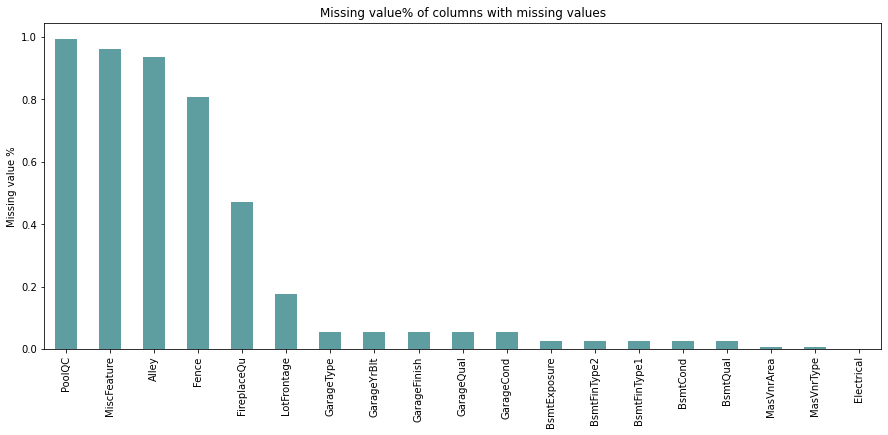

In [9]:
#Plot to see % of missing values in each columns 
plt.figure(figsize=(15,6))
train[col_train_with_missing].isnull().mean().sort_values(ascending=False).plot.bar(ylabel="Missing value %", title="Missing value% of columns with missing values",color='cadetblue')

In [10]:
# Check if missing value columns are consistent in training vs. testing
print(f"Have missing values in testing but not in training data: { set(col_test_with_missing).difference(set(col_train_with_missing)) }\n")
print(f"Have missing values in training but not in testing data: { set(col_train_with_missing).difference(set(col_test_with_missing)) }")

Have missing values in testing but not in training data: {'Exterior2nd', 'SaleType', 'BsmtUnfSF', 'Utilities', 'MSZoning', 'Exterior1st', 'BsmtHalfBath', 'TotalBsmtSF', 'Functional', 'BsmtFinSF2', 'GarageCars', 'BsmtFinSF1', 'KitchenQual', 'BsmtFullBath', 'GarageArea'}

Have missing values in training but not in testing data: {'Electrical'}



#### It's good to note that some columns exhibit missing values in either the training or testing data but not both. For example, there are missing value in "BsmtHalfBath' in testing set but not in training set. There are missing value in "Electrical' in training set but not in training set.

#### Next, let see what records with missing values look like. The goal is to see whether the missing values are random or systematic. That is, to understand if missing values have any meaningful patterns or if they are simply due to chance.

In [11]:
# take a look to see records with missing values
train[train[col_train_with_missing].isnull().any(axis=1)].head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

#### Well, I think missing values aren't due to chances but mostly is indications of irrelevant values. For example, if there is a '0' in "Fireplaces", the "FireplaceQu" would be "NAN". (Although not down here, I did check some other features and see similar patterns). 

<div style="background-color: #cecec0; padding: 10px;">
<span style="font-size: larger;">

### Missing Values Observation Summary and Removal Methods 🌱
- Observations:
  - The dataset contains many columns with numerous missing values which indicates that **irrelevant values are represented as missing** (e.g., "NaN" when there are 0 "FirePlaces") instead of random.
  - **Some columns exhibit missing values in either** the training or testing data **but not both**.
  
- Methods:
  - For **numerical features**, missing values will be filled with some numbers (either 0, mean, or median, we'll decide which is the best after some deeper EDAs). But since this is numerical and missing values has some meaning (indicate a irrelevant value), we need **additional indicator columns to denote where values were imputed**.
  - **Categorical features will be filled with "missing"**, serving both imputation and indication purposes.


# <a id="7"></a>
<div style="text-align: center; background-color: #CDDAA5; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2> Part 1.3.2: Dependent Variable Distribution</h2>
</div>

### Check dependent variable sale price 



Training data "SalePrice" skewness: 1.882876
Training data "SalePrice" kurtosis: 6.536282


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

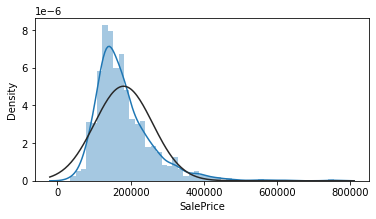

In [12]:
#Check skewness & kurtosis of dependent variable SalePrice
print("Training data \"SalePrice\" skewness: %f" % train['SalePrice'].skew())
print("Training data \"SalePrice\" kurtosis: %f" % train["SalePrice"].kurt())

#Check distribution of dependent variable SalePrice 
plt.figure(figsize=(6,3))
sns.distplot(train['SalePrice'], fit= norm)

####  Skewness (1.882876):
  - Skewness measures the asymmetry of the distribution of a variable. According to [this article](https://community.gooddata.com/metrics-and-maql-kb-articles-43/normality-testing-skewness-and-kurtosis-241), the house price here is highly right skewed(skewness>1). That is, there are extreme and infrequent high house prices than a normal distribution.

#### Kurtosis (6.536282):
  - Kurtosis measures the peakedness of the distribution compared to a normal distribution. A positive kurtosis value greater than 3 indicates fatter tailed and a sharper peak distribution than normal distribution. That is, there are more high and low extreme house prices (outliers) compared to a normal distribution.


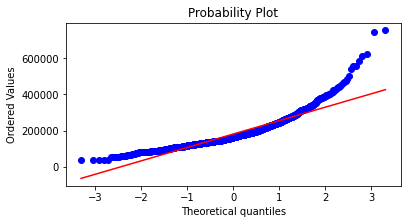

In [13]:
#Use probability plot to check normality of data
plt.figure(figsize=(6,3))
res=stats.probplot(train['SalePrice'], plot=plt)

<AxesSubplot:>

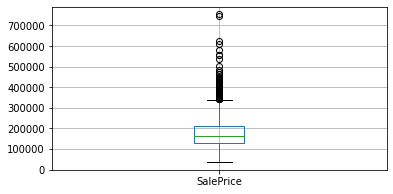

In [14]:
#Boxplot is a good way to check distribution, spread, and outlier of numerical variables 
plt.figure(figsize=(6,3))
train.boxplot(column =['SalePrice'])

<div style="background-color: #cecec0; padding: 10px;">
<span style="font-size: larger;">

### Dependent variable house price distribution 🌱
- Observation: 
  - The distribution of house prices **isn't normally distributed, it tends to be quite right-skewed**, which can affect the performance of some machine learning models, particularly those assuming **normally distributed residuals like linear regression**. 
  - There are **many outliers** especially in the higher end. Outliers can significantly affect the performance of statistical models, particularly those sensitive to the scale and distribution of the data, such as linear regression.
    
    
- Methods:
  - Transforming the response variable to meet the normality assumption can enhance the performance of linear models, without typically harming the performance of models not relying on normality. So, for simplicity, we'll probably just do it for all models.
  - One way to make the distribution more normal is applying a **logarithmic transformation**. 
  - Logarithmic transformation can also **help mitigate the influence of outliers** in the data because it compresses the range of values, particularly for larger values, making extreme values less influential.
  - Moreover, logarithmic transformation can **help improve homoscedasticity**, which is another assumption of linea regression (also called "constant variance" assumption). But the relationship btween response and predictors will be discovered more in later deeper EDA. So, we'll decide how to transform data after some deeper EDA.

# <a id="8"></a>
<div style="text-align: center; background-color: #CDDAA5; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2> Part 1.3.3: Datetime Features</h2>
</div>

#### Datetime features usually need some transformation so we can extract some useful information from them. <br>


In [15]:
# Get Datetime features
col_year= [feature for feature in train.columns if "Year" in feature or "Yr" in feature]
col_year_test = [feature for feature in test.columns if "Year" in feature or "Yr" in feature]

[](http://)

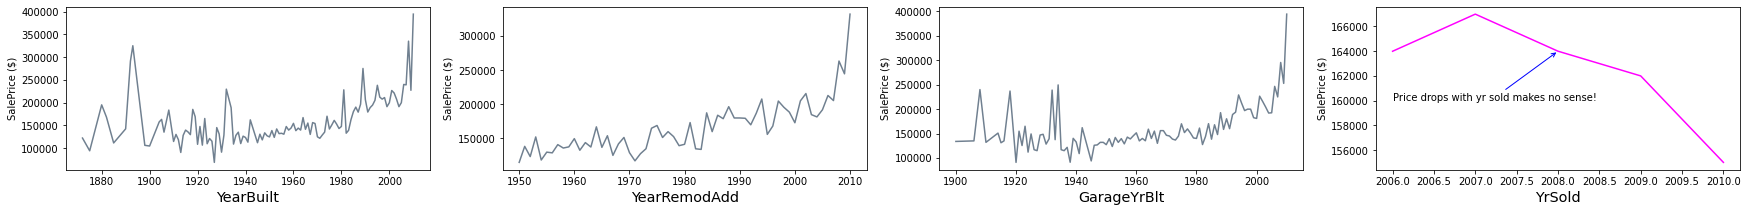

In [16]:
# Plots to see relationship of target variable SalePrice and Year features.
fig=plt.figure(figsize=(30,3))
for count, feature in enumerate(col_year, 1):
    data= train.copy()
    ax=fig.add_subplot(1,len(col_year),count)
    if feature == 'YrSold':
        ax.plot(data.groupby(feature)["SalePrice"].median(), color='fuchsia')
        ax.annotate("Price drops with yr sold makes no sense!", xy=[2008.0,164000], xytext=[2006.0, 160000], arrowprops={'arrowstyle':"->",'color':"blue"})
    else:
        ax.plot(data.groupby(feature)["SalePrice"].median(), color="slategray")
    ax.set_xlabel(feature, fontsize='x-large')
    ax.set_ylabel("SalePrice ($)")
    
plt.show()

#### It seems **"YrSold" isn't a good feature to use directly** since the sale price drop as the year increase. But **the difference between year sold and other year features would be some ages of the houses, which might be good features** to predict sale price. Let's create the following age features and draw some plots and see how it goes:
- Age of the house (at the time of sale).
- Age of the house since the last remodel (at the time of sale).
- Age of the house since the last garage built (at the time of sale).

<function matplotlib.pyplot.show(close=None, block=None)>

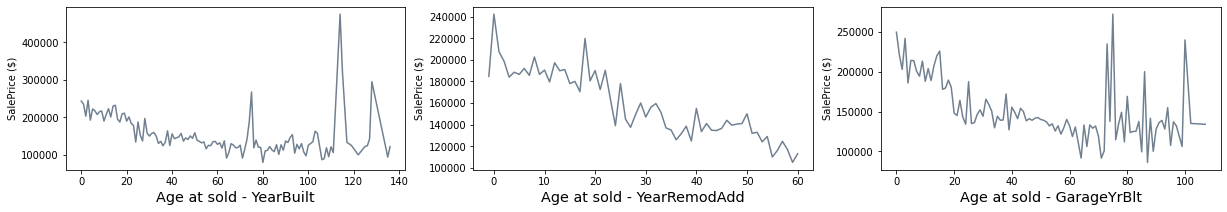

In [17]:
# Plot difference of year features with year sold with sale price a
fig=plt.figure(figsize=(28,3))
for count, feature in enumerate(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt'], 1):
    data= train.copy()
    data[feature]=data['YrSold'] - data[feature]
    ax=fig.add_subplot(1,len(col_year),count)
    ax.plot(data.groupby(feature)["SalePrice"].median(), color="slategray")
    ax.set_xlabel('Age at sold - '+ str(feature), fontsize='x-large' )
    ax.set_ylabel("SalePrice ($)")
plt.show 

#### Now the relationship between sale price and the features seem more reasonable. We can see there is a trend that the older the house, usually the lower the price. We'll create those new features in data preprocessing.

# <a id="9"></a>
<div style="text-align: center; background-color: #CDDAA5; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2> Part 1.3.4: Discrete and Continuous Features</h2>
</div>

####  First, let's get numerical and categorical features.

In [18]:
# First, get numerical vs. categorical features

#Find numerical & cateogorical features for training data
col_NonYr= [feature for feature in train.columns if feature not in col_year]
col_num=[]
col_cat=[]
for c in col_NonYr:    
    if (train[c].dtype!='O') and (c not in col_year):
        col_num.append(c)
    else:
        col_cat.append(c)

#Find numerical & cateogorical features for testing data
col_NonYr_test= [feature for feature in test.columns if feature not in col_year_test]
col_num_test=[]
col_cat_test=[]
for c in col_NonYr_test:    
    if (test[c].dtype!='O') and (c not in col_year_test):
        col_num_test.append(c)
    else:
        col_cat_test.append(c)

#### Now we are ready to **seperate discrete and continuous numerical variables**. But which numerical features are actually discrete? Remember we will treat numberical features without many unique values as discrete. So, let's find out the number of unique values in those numerical features first to decide the **cut-off threshold**. 


In [19]:
#Check unique values in each numerical feature (training data)
uniques={}
for feature in col_num:
    unique=len(train[feature].unique())
    uniques[feature]=unique    

#Sorted the unique values
uniques_sorted = {k: v for k, v in sorted(uniques.items(), key=lambda item: item[1])}
for pair in uniques_sorted.items():
  print(pair)

('BsmtHalfBath', 3)
('HalfBath', 3)
('BsmtFullBath', 4)
('FullBath', 4)
('KitchenAbvGr', 4)
('Fireplaces', 4)
('GarageCars', 5)
('BedroomAbvGr', 8)
('PoolArea', 8)
('OverallCond', 9)
('OverallQual', 10)
('TotRmsAbvGrd', 12)
('MoSold', 12)
('MSSubClass', 15)
('3SsnPorch', 20)
('MiscVal', 21)
('LowQualFinSF', 24)
('ScreenPorch', 76)
('LotFrontage', 111)
('EnclosedPorch', 120)
('BsmtFinSF2', 144)
('OpenPorchSF', 202)
('WoodDeckSF', 274)
('MasVnrArea', 328)
('2ndFlrSF', 417)
('GarageArea', 441)
('BsmtFinSF1', 637)
('SalePrice', 663)
('TotalBsmtSF', 721)
('1stFlrSF', 753)
('BsmtUnfSF', 780)
('GrLivArea', 861)
('LotArea', 1073)
('Id', 1460)


#### Seems in this case, there is a jump from unique values count 24 (in 'LowQualFinSF') to 76 (in 'ScreenPorch'). So, it seems reasonable to set the cut-off point to be 25. That is, **when there are less than 25 unique values in a numerical feature, we will put it to discrete feature**.

In [20]:
#Seperate numerical features by discrete and continuous features in trainng and testing data
col_disc=[feature for feature in col_num if len(train[feature].unique())<=25]
col_cont=[feature for feature in col_num if feature not in col_disc and feature != "Id"]

col_disc_test=[feature for feature in col_num_test if len(test[feature].unique())<=25]
col_cont_test=[feature for feature in col_num_test if feature not in col_disc_test]

#Take a look at discrete vs continous features
print(f"Discrete features:\n {col_disc}\n")
print(f"Continuous features:\n {col_cont}")

Discrete features:
 ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']

Continuous features:
 ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


# <a id="10"></a>
<div style="text-align: center; background-color: #CDDAA5; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2> Part 1.3.5: Data Visualization and Analysis</h2>
</div>


### All Continuous Features - Univariate Analysis

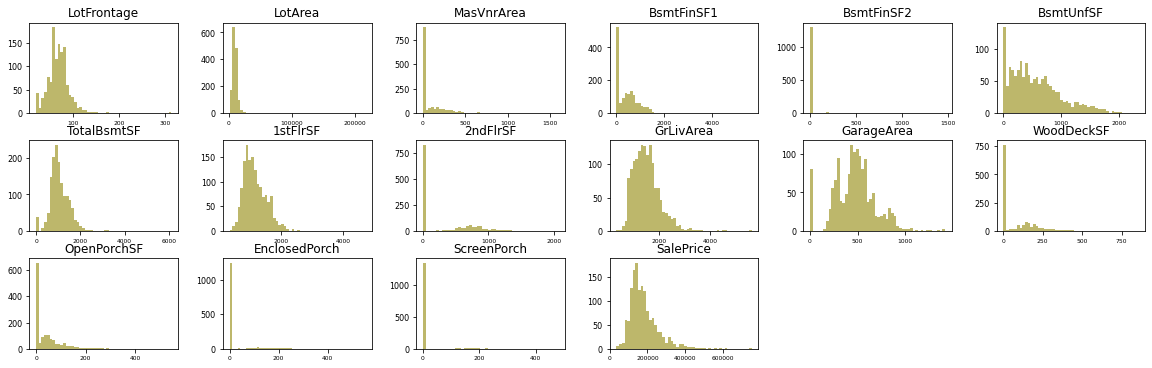

In [21]:
# Histogram for all continuous features
train.loc[:, col_cont].hist(figsize=(20,6), bins=50, xlabelsize=6, ylabelsize=8, color='darkkhaki', grid=False, layout=(3, -1));


### Histogram Observations:
- Some of the features have a normal like distribution but some of them don't. Linear regression doesn't assume the features to be normally distributed. So, we don't need to worry here. (Liner regression does require the dependent variable to be normally distributed though. But we've discussed this in part 1.3.2)

### All Continuous Features - Bivariate Analysis

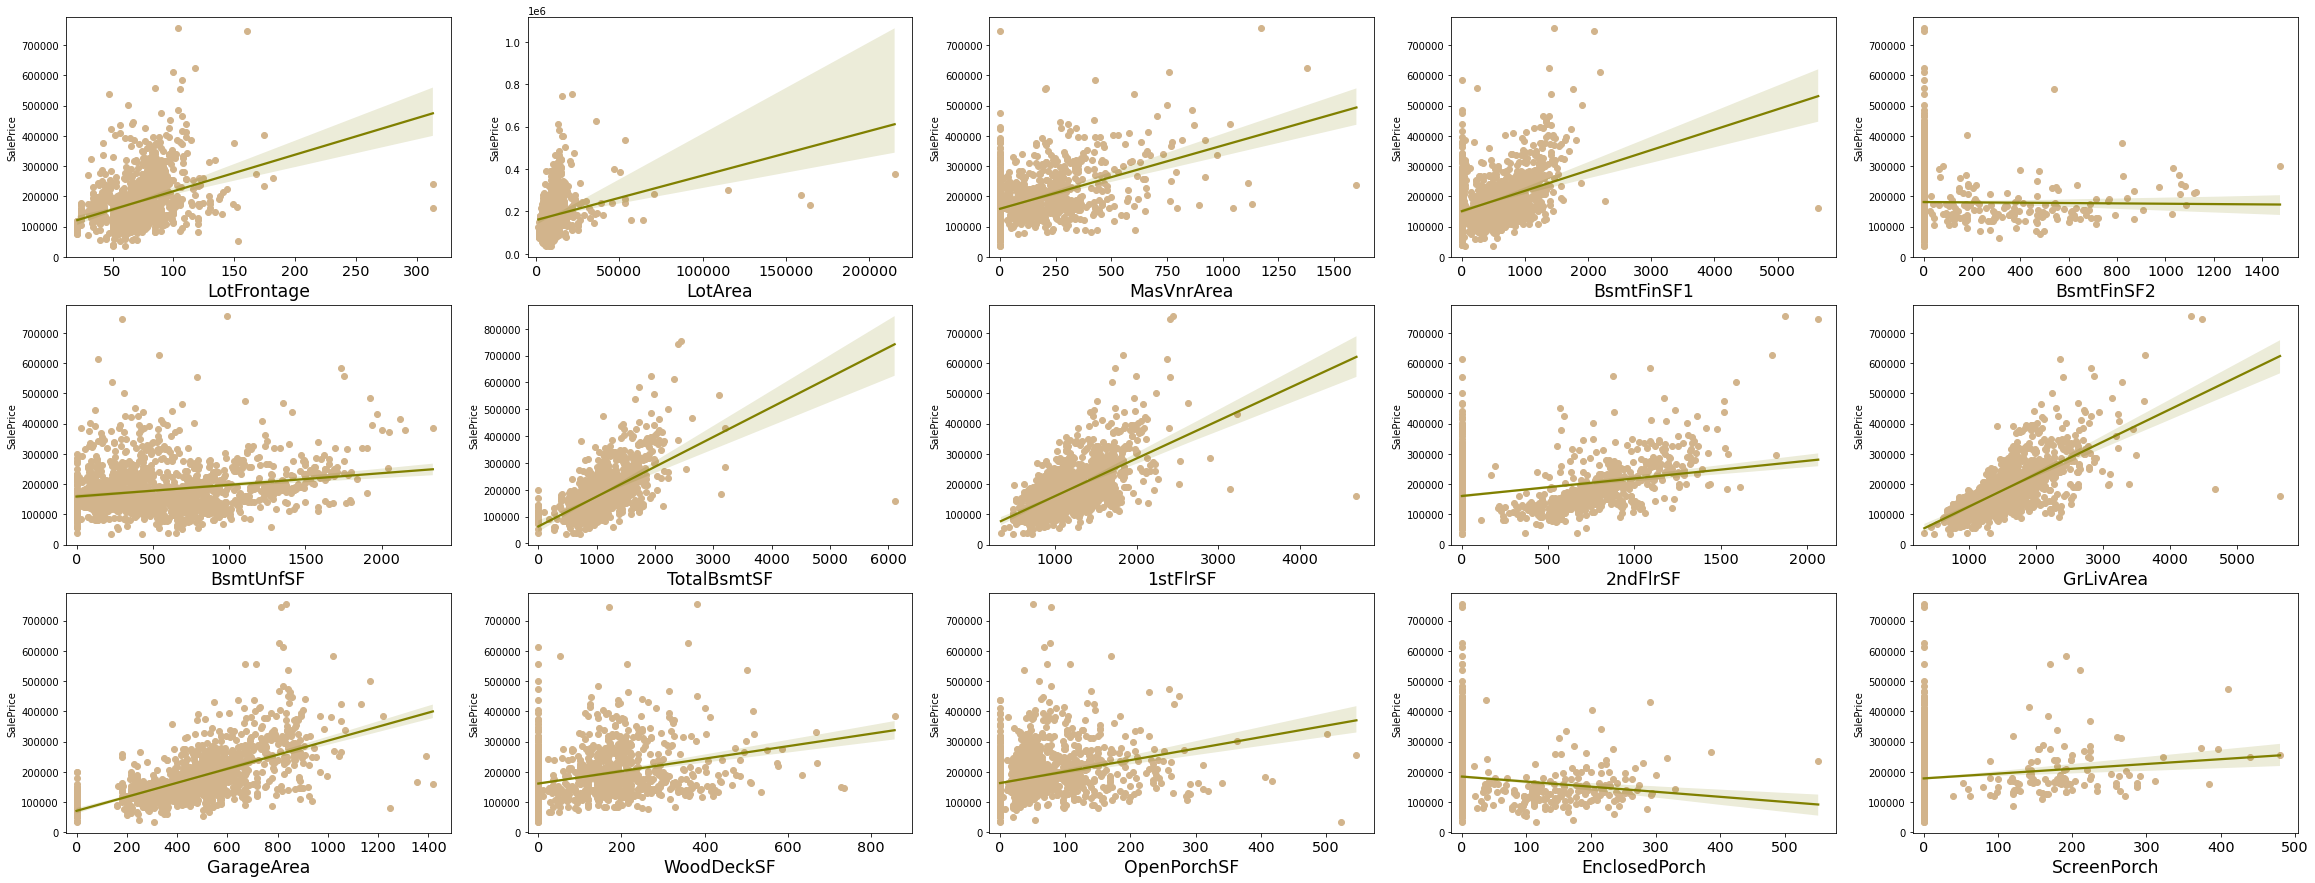

In [22]:
#Draw scatter plots for all continuous numerical features (training data) 
#Scatter plot is good way to see linearity, homoscedasticity, and residual normality

grh_per_row = 5
fig, ax = plt.subplots(len(col_cont) // grh_per_row, grh_per_row, figsize=(40, 15))

for count, feature in enumerate(col_cont[:-1], 0):
        data = train.copy()
        row = count // grh_per_row
        col = (count) % grh_per_row
        
        # Scatter plot
        ax[row, col].scatter(data[feature], data['SalePrice'], color="tan")
        ax[row, col].set_xlabel(feature, fontsize='xx-large')
        ax[row, col].set_ylabel("SalePrice ($)")
        ax[row,col].set_xlim(left=data[feature].min() - data[feature].max()*0.03)
        ax[row, col].tick_params(axis='x', labelsize='x-large')

        #regression line
        sns.regplot(x=feature, y='SalePrice', data=data, ax=ax[row, col], scatter=False, color='olive')
    
plt.show()


### Scatter plots observations:

- For some features, there are **many zero values. This reduces the slope of the regrssion line too much** for some features. For example, **'2ndFlrSF',** would have a much steeper slopes and potentially good predictors otherwise. **'EnclosedProch'** would have a slight positive slope instead of a negative one (which doesn't make sense). Those might affect linear regression model performance.
- There are **some outliers that affected the slope too much** too. For example, it seems **'LotArea'** has some high 'LotArea' and lowere 'SalePrice' observations that brings the slope down.
- The distribution of dependent variable 'SalePrice' or residuals don't have constant variance. This **violate the homoskedasticity** assumption of linear regression.
- **Lots of continuous features** seem to have good linear relationship with 'SalePrice'. They **could be good predictors** (although they could be highly correlated to each other which leads to co-linearity problems). For example, 'LotFrontage', 'LotArea'(although the slope could be higher with out outlier), and etc. Moreover, the newly created feature seem to be good predictors too especially 'YrSold-YearBuilt' (age of the house). Those all make sense.



### All Discrete & Categorical Features - Univariate Analysis

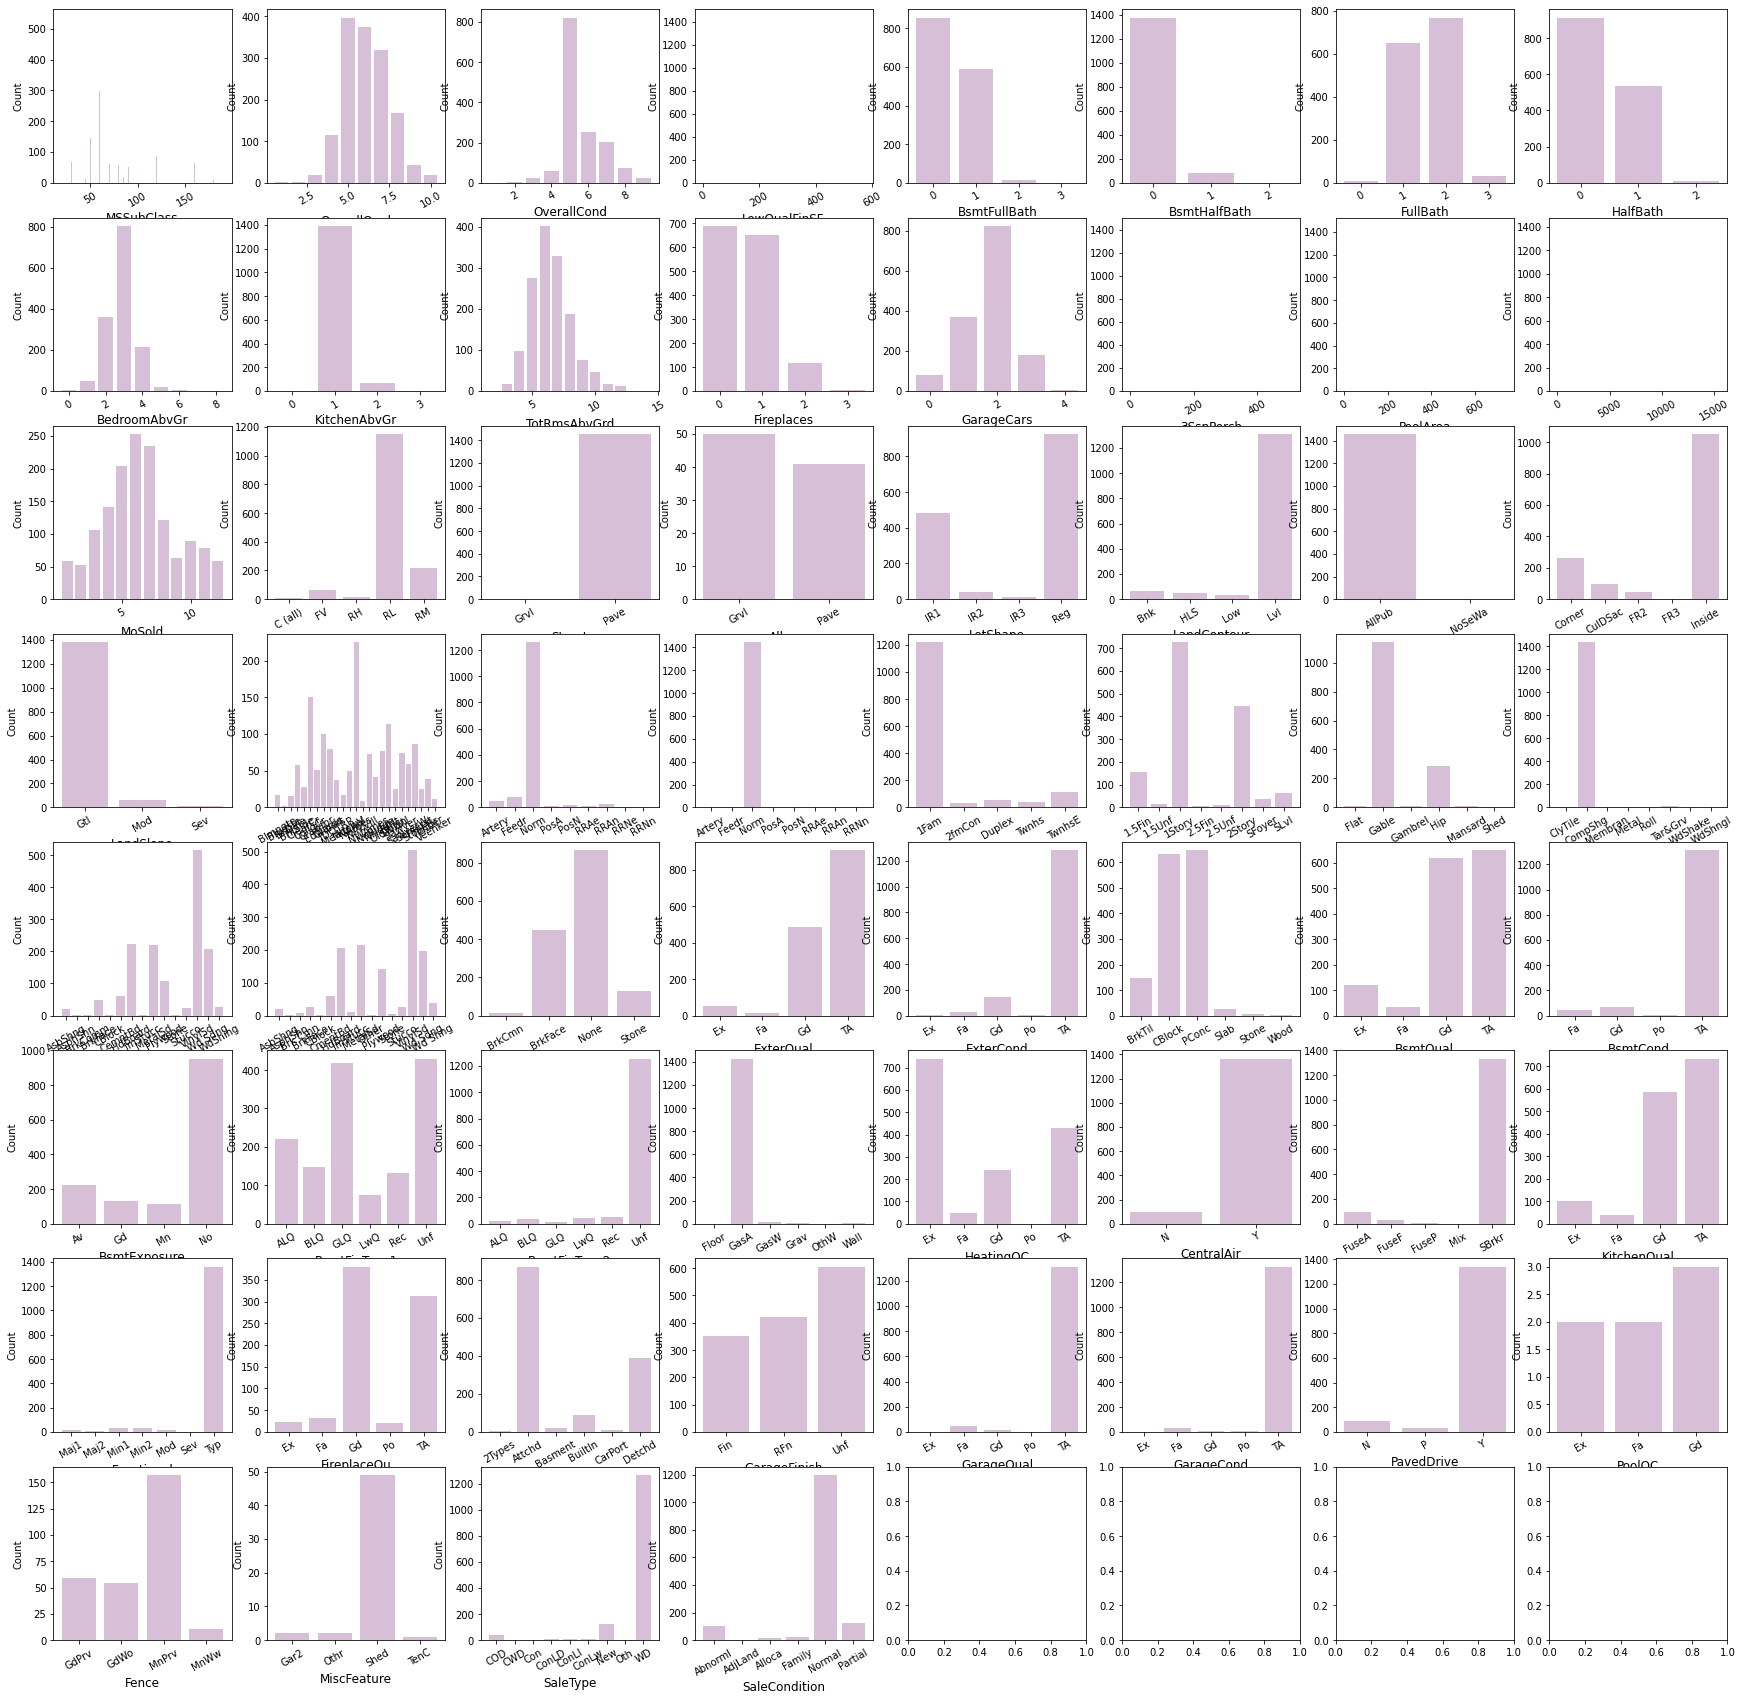

In [23]:
# bar plot for all discrete & categorical features
grh_per_row = 8
fig, ax = plt.subplots((len(col_disc) + len(col_cat)) // grh_per_row +1, grh_per_row, figsize=(30, 30))

for count, feature in enumerate(col_disc+col_cat, 0):
    data = train.copy()
    row = count // grh_per_row
    col = (count) % grh_per_row    
    counts = data[feature].value_counts().sort_index()
    ax[row, col].bar(counts.index, counts.values, color="thistle")
    ax[row, col].set_xlabel(feature, fontsize='large')
    ax[row, col].set_ylabel("Count")
    ax[row, col].tick_params(axis='x', labelrotation=30) 

plt.show()

### Bar Plot Observations:
- Some categorical features has some **rare categories** (that has very few counts). Since we need to do label encoding, it's a good to handle rare categories by **grouping them together as one category**. This helps in reducing the dimensionality of the categorical features if we do one-hot encoding. Also, this can help avoid overfitting caused by rare categories. 


### All Discrete & Categorical Features - Bivariate Analysis

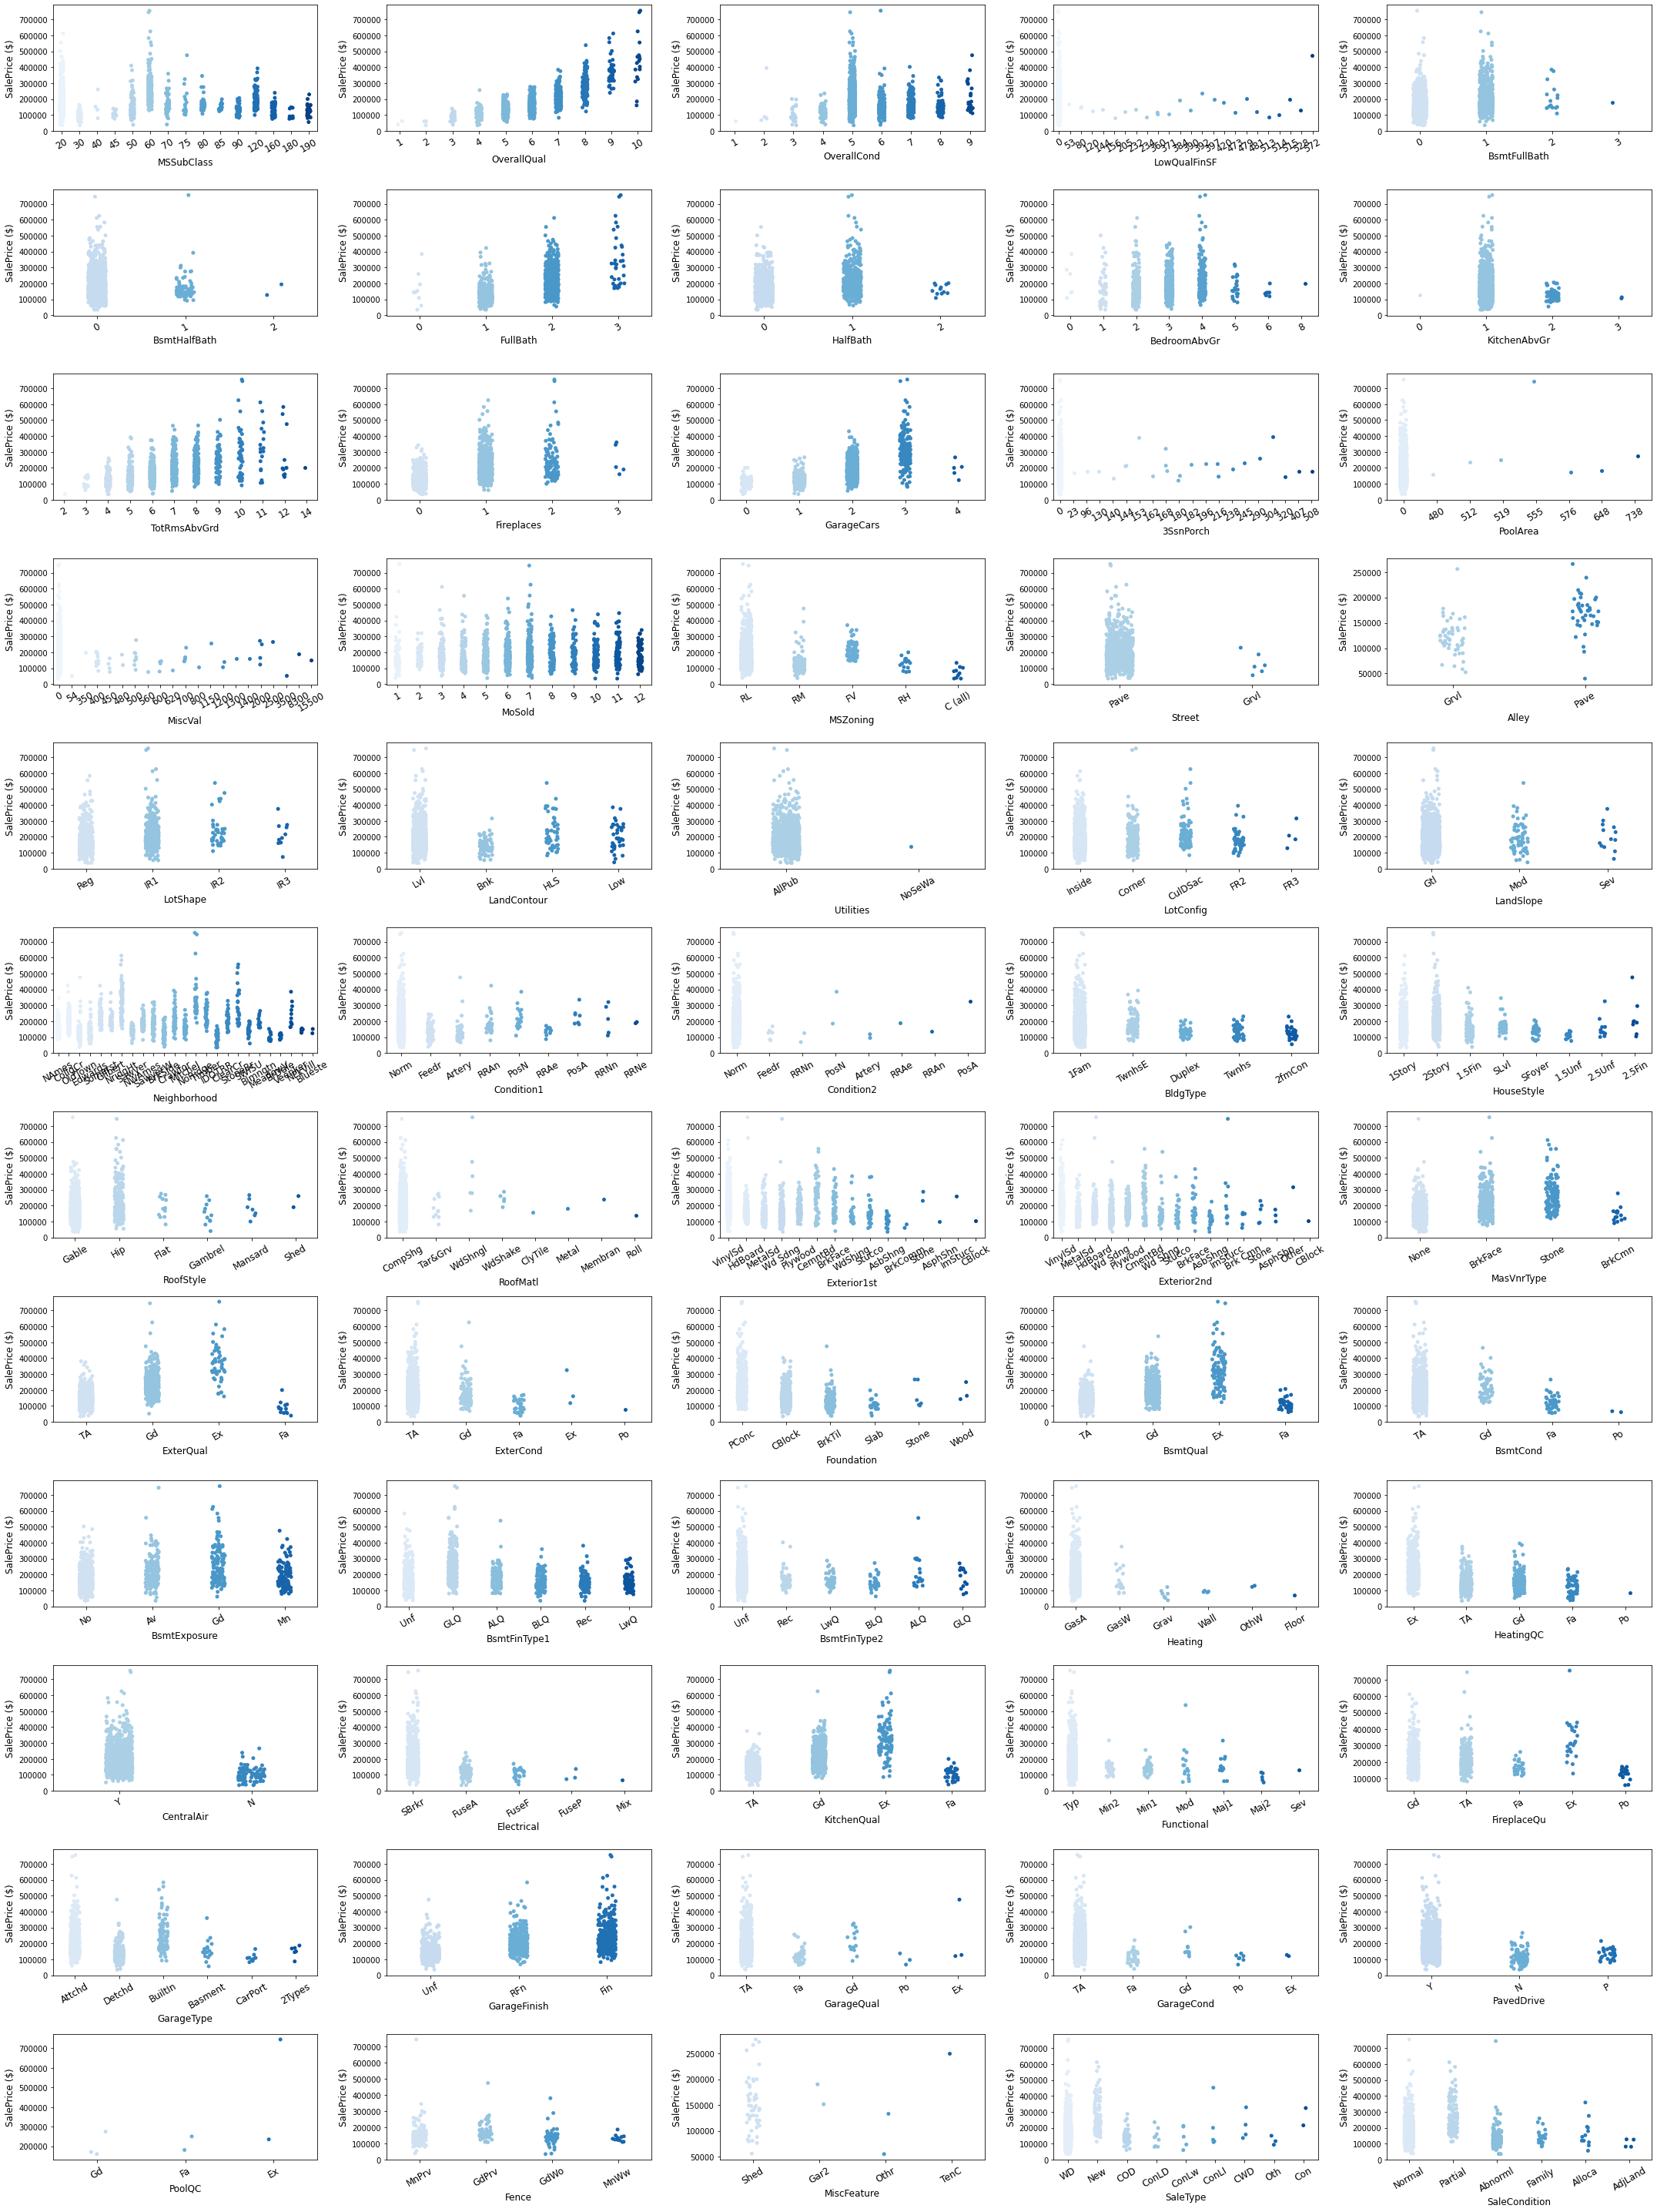

In [24]:
# discrete/categorical features vs. Saleprice - strip plot

grh_per_row =5
fig, ax = plt.subplots((len(col_disc) + len(col_cat)) // grh_per_row, grh_per_row, figsize=(30, 40))

for count, feature in enumerate(col_disc + col_cat, 0):
    data = train.copy()
    row = count // grh_per_row
    col = (count) % grh_per_row    
    
    # x-ticks order 
    x_order = sorted(data[feature].unique()) if feature in col_disc else data[feature].value_counts().index
    
    # Plot
    sns.stripplot(x=feature, y='SalePrice', data=data, ax=ax[row, col], palette="Blues", order=x_order)
    ax[row, col].set_xlabel(feature, fontsize='large')
    ax[row, col].set_ylabel("SalePrice ($)", fontsize='large')
    ax[row, col].tick_params(axis='x', labelrotation=30, labelsize='large')

plt.tight_layout()
plt.show()


#### Strip Plot Observations:
- For lots of features, when we fix the x value, the distribution of y (SalePrice) isn't normal. Lots of them have long tails (high and unfrequent high SalePrices). This **violates the normality** of linear regression. We expect the residuals to be normally distributed.
- Also, when we fix x, the variance of y or residuals aren't constant. This **violates the homoskedasticity** assumption of linear regression.


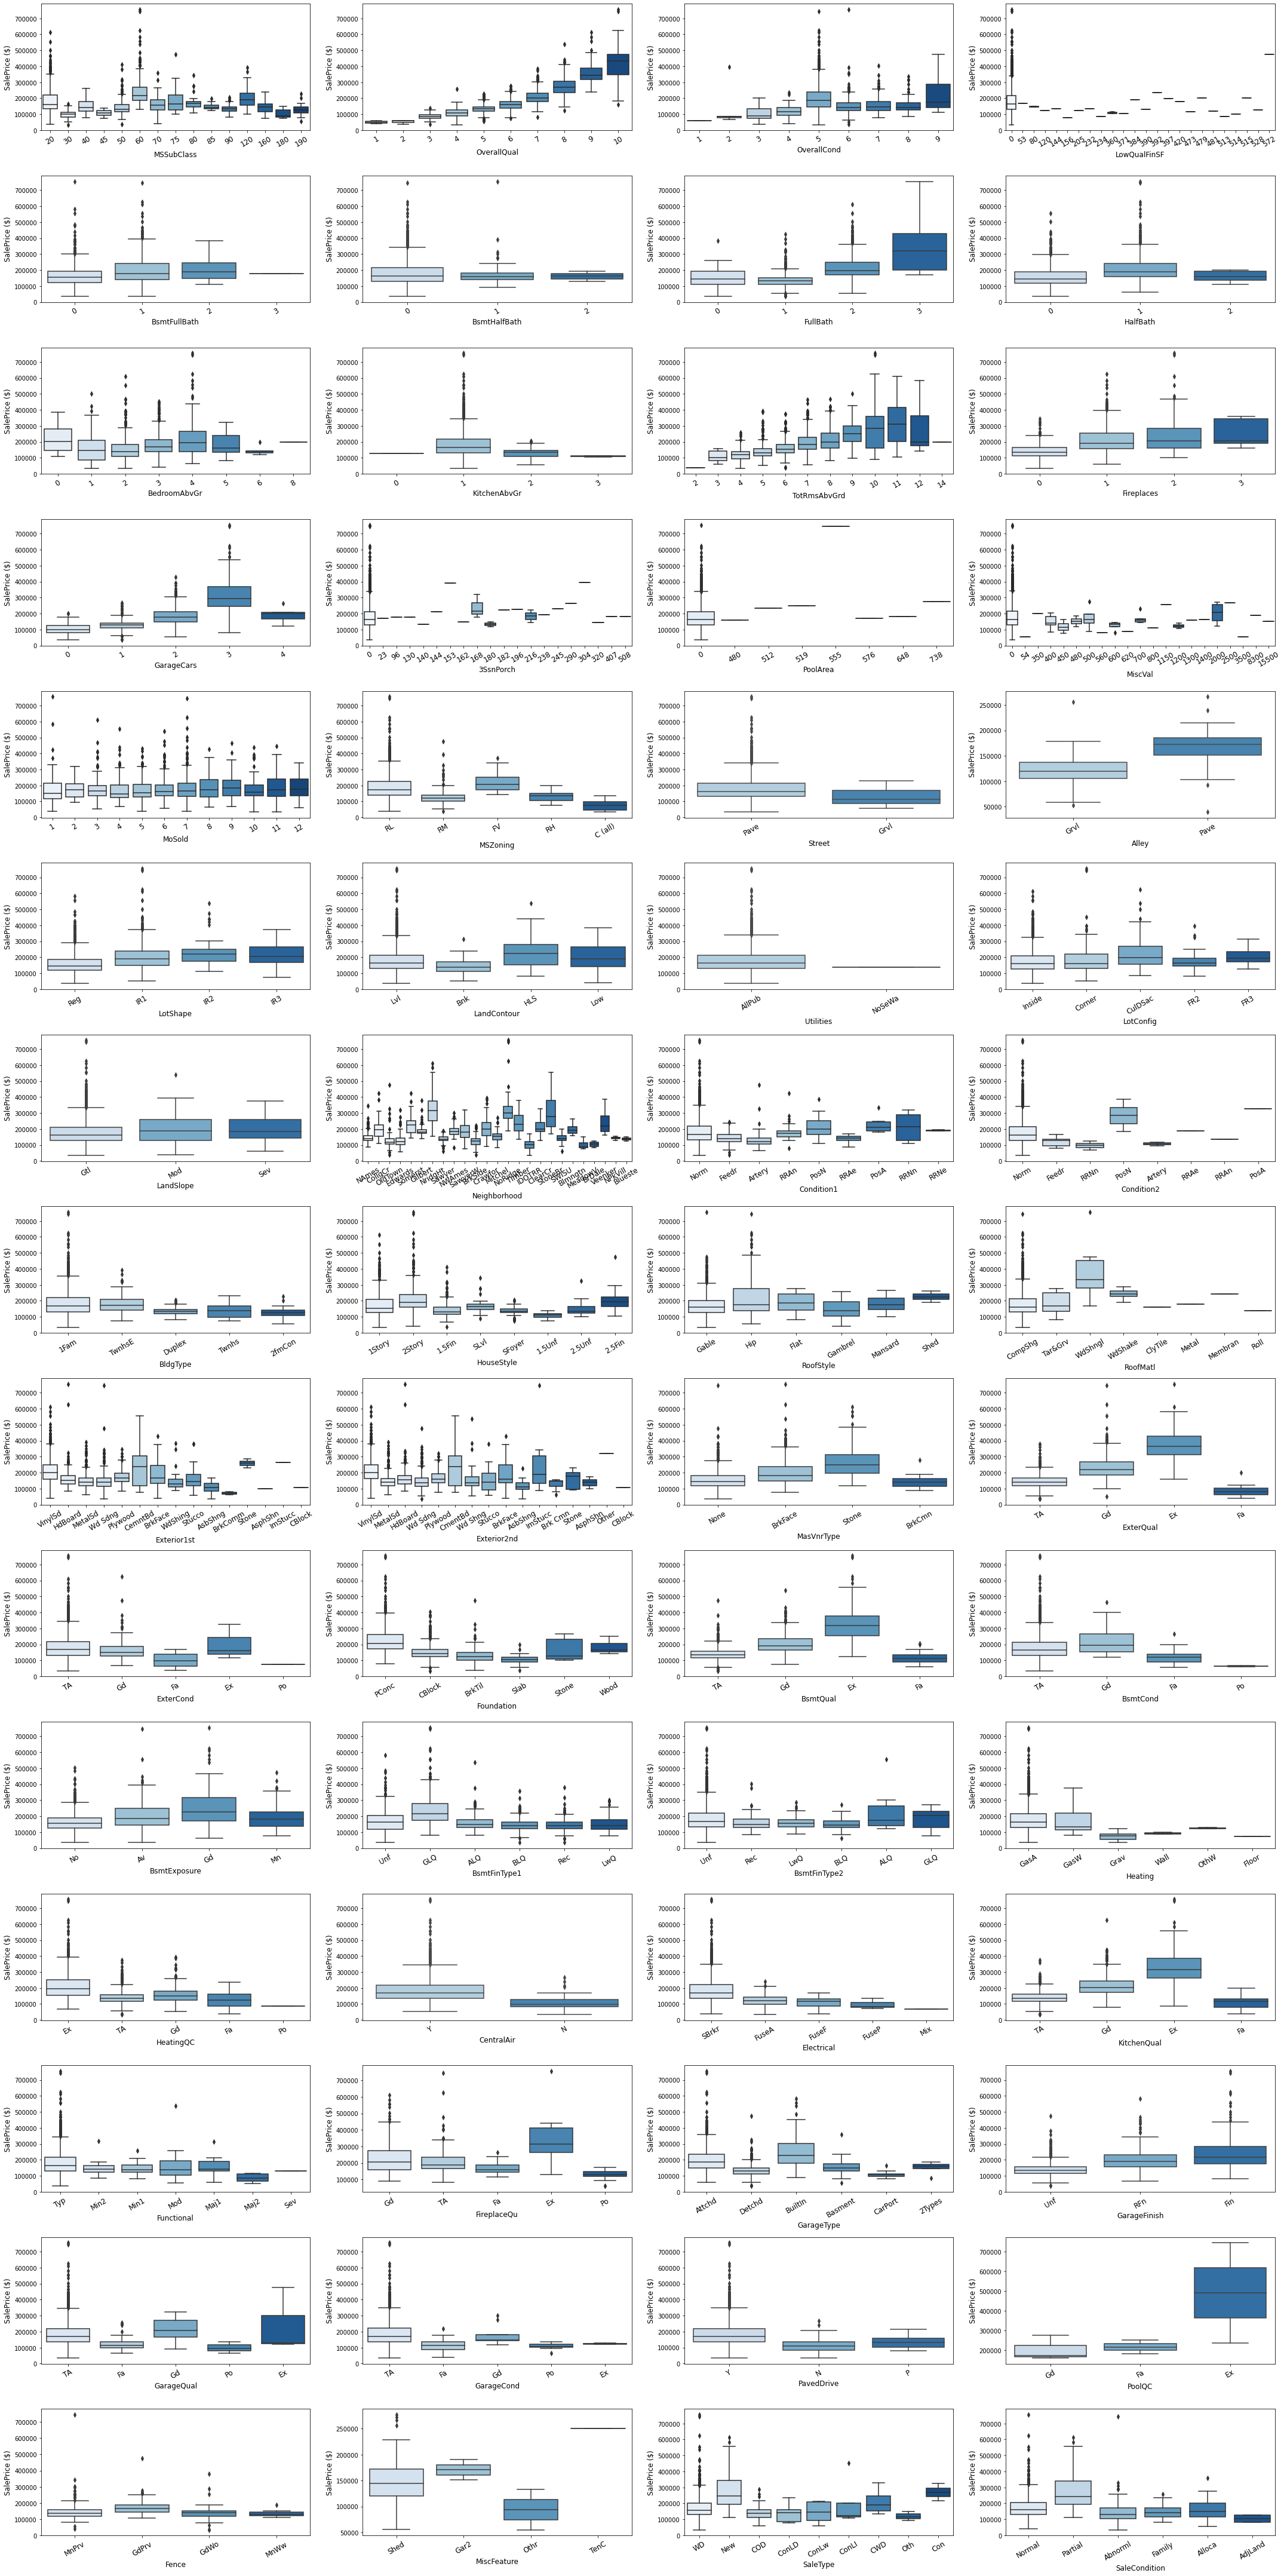

In [25]:
# discrete/categorical features vs. Saleprice - boxplot
grh_per_row = 4
fig, ax = plt.subplots((len(col_disc) + len(col_cat)) // grh_per_row, grh_per_row, figsize=(30, 60))

for count, feature in enumerate(col_disc + col_cat, 0):
    data = train.copy()
    row = count // grh_per_row
    col = (count) % grh_per_row    
    
    # x-ticks order 
    x_order = sorted(data[feature].unique()) if feature in col_disc else data[feature].value_counts().index
    sns.boxplot(x=feature, y='SalePrice', data=data, ax=ax[row, col], palette="Blues", order=x_order)
    
    # Plot
    ax[row, col].set_xlabel(feature, fontsize='large')
    ax[row, col].set_ylabel("SalePrice ($)", fontsize='large')
    ax[row, col].tick_params(axis='x', labelrotation=30, labelsize='large') 

plt.tight_layout()
plt.show()

### Boxplot Observations:
- For some discrete features, there is a trend that the housing price is higher in some categories. Those feature would potentially be **good predictors**. For example, I found the houses with the some conditions seem to to have **higher price**:
  - Higher **'OverallQual'**, more **"FirePlace"**, more **"TotRmsAbvGrd"** (not effective after 11), higher the price
  - With **"BsmtFullBath"**, or with more than 2 **"FullBath"**, or with **"PavedDrive"**, or with **"CentralAir"**
  - **"Ex" in "FireplaceQu", "PoolQC" or "KitchenQual", or "BsmtFullBath" (>=1)** 
  - **"SaleCondition"** is "Partical" 
  - **"SaleType"** is "New" or "Con"
  - Some **"Neighborhood"** is more expenseive 

### Heatmap to check feature correlations

<AxesSubplot:title={'center':'Housing data numerical feature correlation'}>

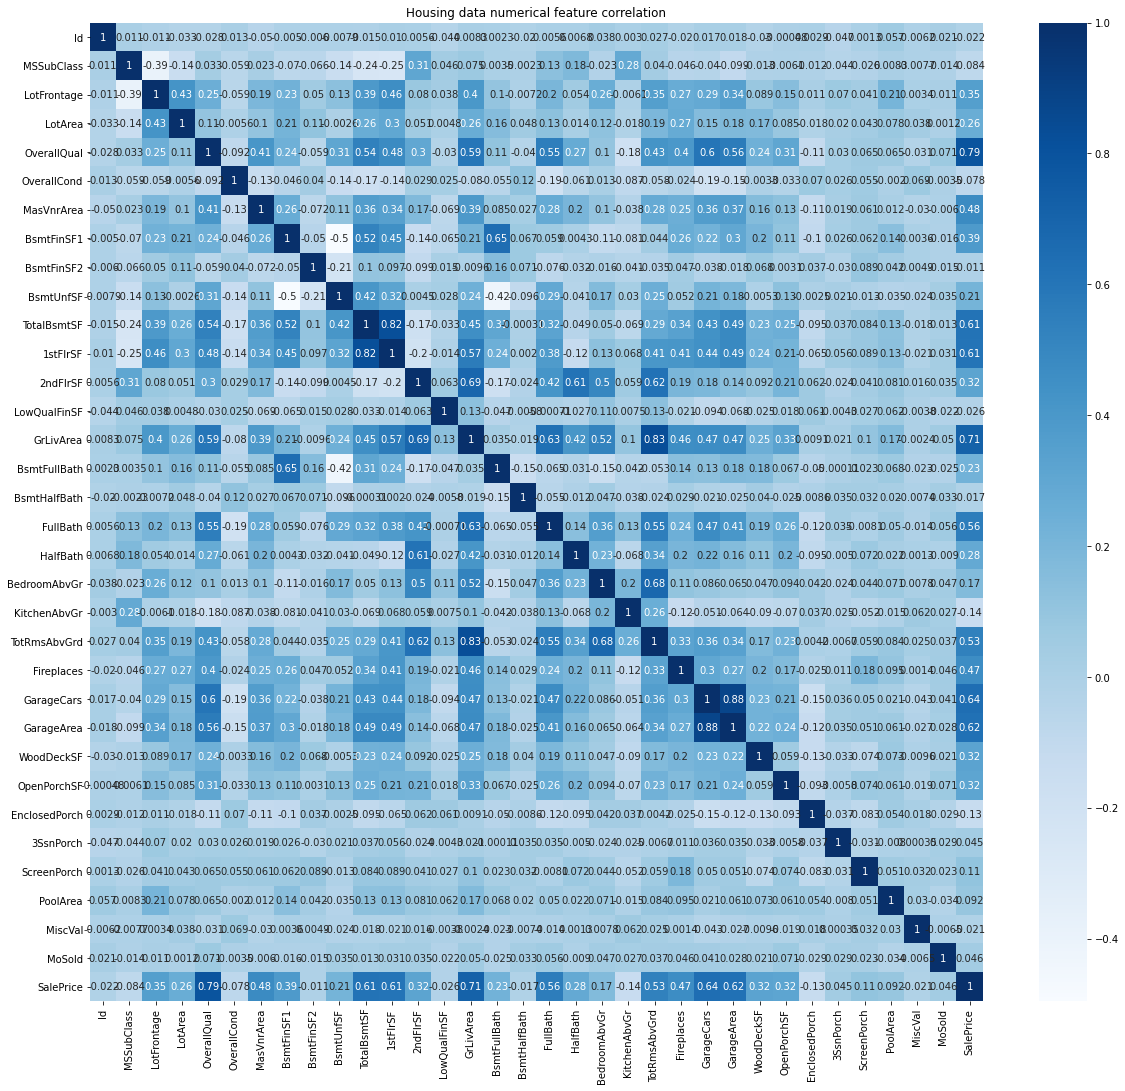

In [26]:
# Use heatmap to check feature correlations
corr=train[col_num].corr()
plt.figure(figsize=(20,18))
plt.title("Housing data numerical feature correlation")
sns.heatmap(data=corr, annot=True, cmap="Blues")

### Heatmap Observations:
- **Some features are highly correlated to sale prices**. For example, "SaleCondition","Neighborhood", and "CentralAir". They could be good predictors. 
- With correlations interpretation from [this article](https://www.dummies.com/article/academics-the-arts/math/statistics/how-to-interpret-a-correlation-coefficient-r-169792), it seems **lots of features have moderate correlations (|0.5|<corr<|0.7|). A few has strong correlations(corr >|0.7|)**. For example, "1stFlrSF" has correlation above 0.8 with "TotalBsmtSF".
- For linear regression, when features are correlated (one feature is linear combination of others), $(X^TX)^-1$ does not exist. A unique solution for $\beta_js$ only exist when $(X^TX)^-1$ exist. Otherwise, the coeficient solution is inifinite or undefined. So, the more correlated the features, the more **unstable and unreliable the $\beta_js$ solutions** would be because of the **increased variance of coefficient estimates**. If we want to be able to explain our model later, this could be very bad. Also, with so many features, the model will tend to **overfit**.
- One way to deal with this is to use regularization by adding a penalty term to shrink the coefficients towards zero to **help with multicollinearity and overfitting**. For linear regression, there are two popular methods:
  - **Lasso** (Least Absolute Shrinkage and Selection Operator): It is also called L1 regularization. This give a sparse solution. If features are highly correlated, it tends to **give some of them  zero coefficients**. This is like doing a **feature selection** where we throw away some redundant features! However, it's **not very stable** in term of "who" they would give zeros to. 
  - **Ridge**: It's also called L1 regularization. tends to **give small coefficients  (but not zeros) ** to highly correlated features. It doesn't have the feature selection effect but it's **more stable**.



<div style="background-color: #cecec0; padding: 10px;">
<span style="font-size: larger;">

    
### EDA observations Summary and plans for data cleansing/pre-processing 🌱
- Found some **outliers that significantly reduced the slope of regression lines** for a few features. We will need to remove them.
- **Found the presence of numerous zero values in many features. This violates** the linear agression model assumption of **linearity mostly and also homoskedasticity, and normality**. Some features experienced **a drastic reduction in slope due to the prevalence of zero values. In some cases, these zero values even inverted the slope**. This problem may **posing a significant challenge to the linear regression model's performance**.  Here, I can see **a tree model may work better** may work better to handle non-linearities. For example,for '2ndFlrSF', a tree could first ask if there is a 2nd floor.
- We also found the **dependent variable does not follow homoskedasticity and normality assumptions** for linear regression model. As discussed in part 1.3.2, we will try to do **logarithmic transformation on the dependent variable** to fix this. This will also help us the reduce the effect of outliers. 
- We will do **logarithmic transformation on features also**, this will further help with **homoskedasticity**. Also, we've learned the dependent variablesthe don't have to have linear relationship with features but to the coefficients they do need to have linear relationships. Logarithmic transformation can help **linearize non-linear relationships between predictors and coefficients**. To illustrate, if data has relationship of Y=$\beta_0+\beta_1*2^X$, it is still okay to use linear regression model. But, we need to look at $2^X$ as a whole and determine the coefficients. That is, we need to transfer $2^X$ to let $\beta_1$ to have linear relationship with Y. For instance, we can let Z=$2^X$ and let Y=$\beta_0+\beta_1*Z$ 
- For linear regression models, we will need to do **feature scaling** for fast convergence and balanced feature influence. Wwe will do this in model traning stage though in pipeline.
- We observed that **some categorical features contain rare categories**. To prevent overfitting and ensure model generalization, we will **group these rare categories together**. By aggregating infrequent categories, we can reduce noise in the data and improve the robustness of our model.
- For categorical feature encoding, as we've seen that some categorical features has **rare categories, we will try to group them together**. Also, since we have so many columns already, we will try to do **label encoding** instead of one-hot encoding. Label-encoding is for ordinal features, we will **utilize the average sale price to establish the order of labels for each categorical feature. Categories with higher average sale prices will be assigned higher ordinal labels**. For example, with a categorical feature, if category A has average sale price higher than category B, category A would have a higher order in label.  
- At last, after all the data cleasing, and scaling, I will **drop some useless and redundant features**. For example, we created some 'age' related features based on datetime features. We will need to drop the datetime features.

# <a id="11"></a>
<div style="text-align: center; background-color: #544e70; font-size:80%; font-family: Comic Sans MS; padding: 5px;border-radius:10px 10px; color: white;">
     <h1>Part 2: Data Preprocessing 🌈</h1>
</div>

# <a id="12"></a>


<div style="text-align: center; background-color: #c1cbd7; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 2.1: Fill In Missing Values</h2>
</div>

In [27]:
# make a copy of data for modeling
train_copy=train.copy()
test_copy=test.copy()

### Missing values - Numerical variables

In [28]:
#As seen in the data EDA, missing values have meanings. I replace missing values with median
for feature in col_num:
    if train_copy[feature].isnull().sum()>0:
        # For linear regression,  fill with median
        train_copy["nan_"+feature]=np.where(train_copy[feature].isnull(),1,0)
        train_copy[feature].fillna(train_copy[feature].median(),inplace=True)

for feature in col_num_test:
      if test_copy[feature].isnull().sum()>0:
        # For linear regression,  fill with median
        test_copy["nan_"+feature]=np.where(test_copy[feature].isnull(),1,0)
        test_copy[feature].fillna(test_copy[feature].median(), inplace=True)
                     
# check deletion results
print(train_copy[col_num].isnull().sum().sum())
print(test_copy[col_num_test].isnull().sum().sum())


0
0


### Missing values - Categorical variables

In [29]:
#Fill in categorical missing values with "Missing"
for feature in col_cat:
      train_copy[feature].fillna("Missing",inplace=True)

for feature in col_cat_test:
       test_copy[feature].fillna("Missing", inplace=True)  

# check deletion results   
print(train_copy[col_cat].isnull().sum().sum())
print(test_copy[col_cat_test].isnull().sum().sum())


0
0


### Missing values - Year variables 

In [30]:
#Fill in missing values for year variables similar to numerical ones
for feature in col_year:
    if train_copy[feature].isnull().sum()>0:
       train_copy["nan_"+feature]=np.where(train_copy[feature].isnull(),1,0)
       train_copy[feature].fillna(train_copy[feature].median(),inplace=True)

for feature in col_year_test:
    if test_copy[feature].isnull().sum()>0:
      test_copy["nan_"+feature]=np.where(test_copy[feature].isnull(),1,0)
      test_copy[feature].fillna(test_copy[feature].median(), inplace=True)  
    
# check deletion results   
print(train_copy.isnull().sum().sum())
print(test_copy.isnull().sum().sum())

0
0


# <a id="13"></a>


<div style="text-align: center; background-color: #c1cbd7; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 2.2: Creat New Features</h2>
</div>

In [31]:
#As we've discussed in EDA, we need to create new features based on YrSold
#There are a few records having other year features > YrSold (i.e.,GarageYrBlt > YrSold). Those are data errors. Gladly they are very few.
#Since there are only around 2 of records having this problem, I just set those new features to be 0 if they are negative
for feature in col_year:
    if feature !="YrSold": 
       train_copy["YrSold-"+feature]=np.maximum(train_copy["YrSold"] - train_copy[feature],0)

for feature in col_year_test:
    if feature !="YrSold": 
      test_copy["YrSold-"+feature]=np.maximum(test_copy["YrSold"] - test_copy[feature],0)

# <a id="14"></a>


<div style="text-align: center; background-color: #c1cbd7; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 2.3: Categorical Feature Encoding</h2>
</div>

In [32]:
#Let's check the counts of each categorical features to find the cut-off count for rare features
for feature in col_cat:
    print(feature)
    print(train_copy[feature].value_counts())
    print("______________________")

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
______________________
Street
Pave    1454
Grvl       6
Name: Street, dtype: int64
______________________
Alley
Missing    1369
Grvl         50
Pave         41
Name: Alley, dtype: int64
______________________
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
______________________
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
______________________
Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
______________________
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
______________________
LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
______________________
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77


#### As seen in EDA, some categorical features are with very rare categories. From the counts above, it seems category count < 15 is a good cut-off point. I will group those with <1% (count < 15) features as rare features before label encoding.



In [33]:
# Group < 1% rare categories together 
for feature in col_cat:
    temp=train_copy.groupby(feature)['SalePrice'].count()/len(train_copy)
    temp_df=temp[temp>0.01].index
    train_copy[feature]=np.where(train_copy[feature].isin(temp_df),train_copy[feature],'Rare_var')
    test_copy[feature]=np.where(test_copy[feature].isin(temp_df),test_copy[feature],'Rare_var')

train_copy.isna().sum().sum()

0

In [34]:
#Label encoding refering to average sale price of each "label"
for feature in col_cat:
    labels_ordered=train_copy.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train_copy[feature]=train_copy[feature].map(labels_ordered)
    
    test_default = collections.defaultdict(lambda: 0.0, labels_ordered) #map categories not in training data but in testing to 0
    test_copy[feature]=test_copy[feature].map( test_default)
 
train_copy.isna().sum().sum()

0

# <a id="15"></a>

<div style="text-align: center; background-color: #c1cbd7; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 2.4: Features and Dependent Variable Log Transformation</h2>
</div>

In [35]:
#log transform the target variable for linear regression model:
train_copy["SalePrice"] = np.log1p(train_copy["SalePrice"])

#log transform skewed numeric features (note to add 1 since some features are zero):
skewed_feats = train_copy[col_num].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index
train_copy[skewed_feats] = np.log1p(train_copy[skewed_feats])
test_copy[skewed_feats] = np.log1p(test_copy[skewed_feats])

#log transform categorical features:
train_copy[col_cat] = np.log1p(train_copy[col_cat])
test_copy[col_cat] = np.log1p(test_copy[col_cat])
train_copy.isna().sum().sum()

0

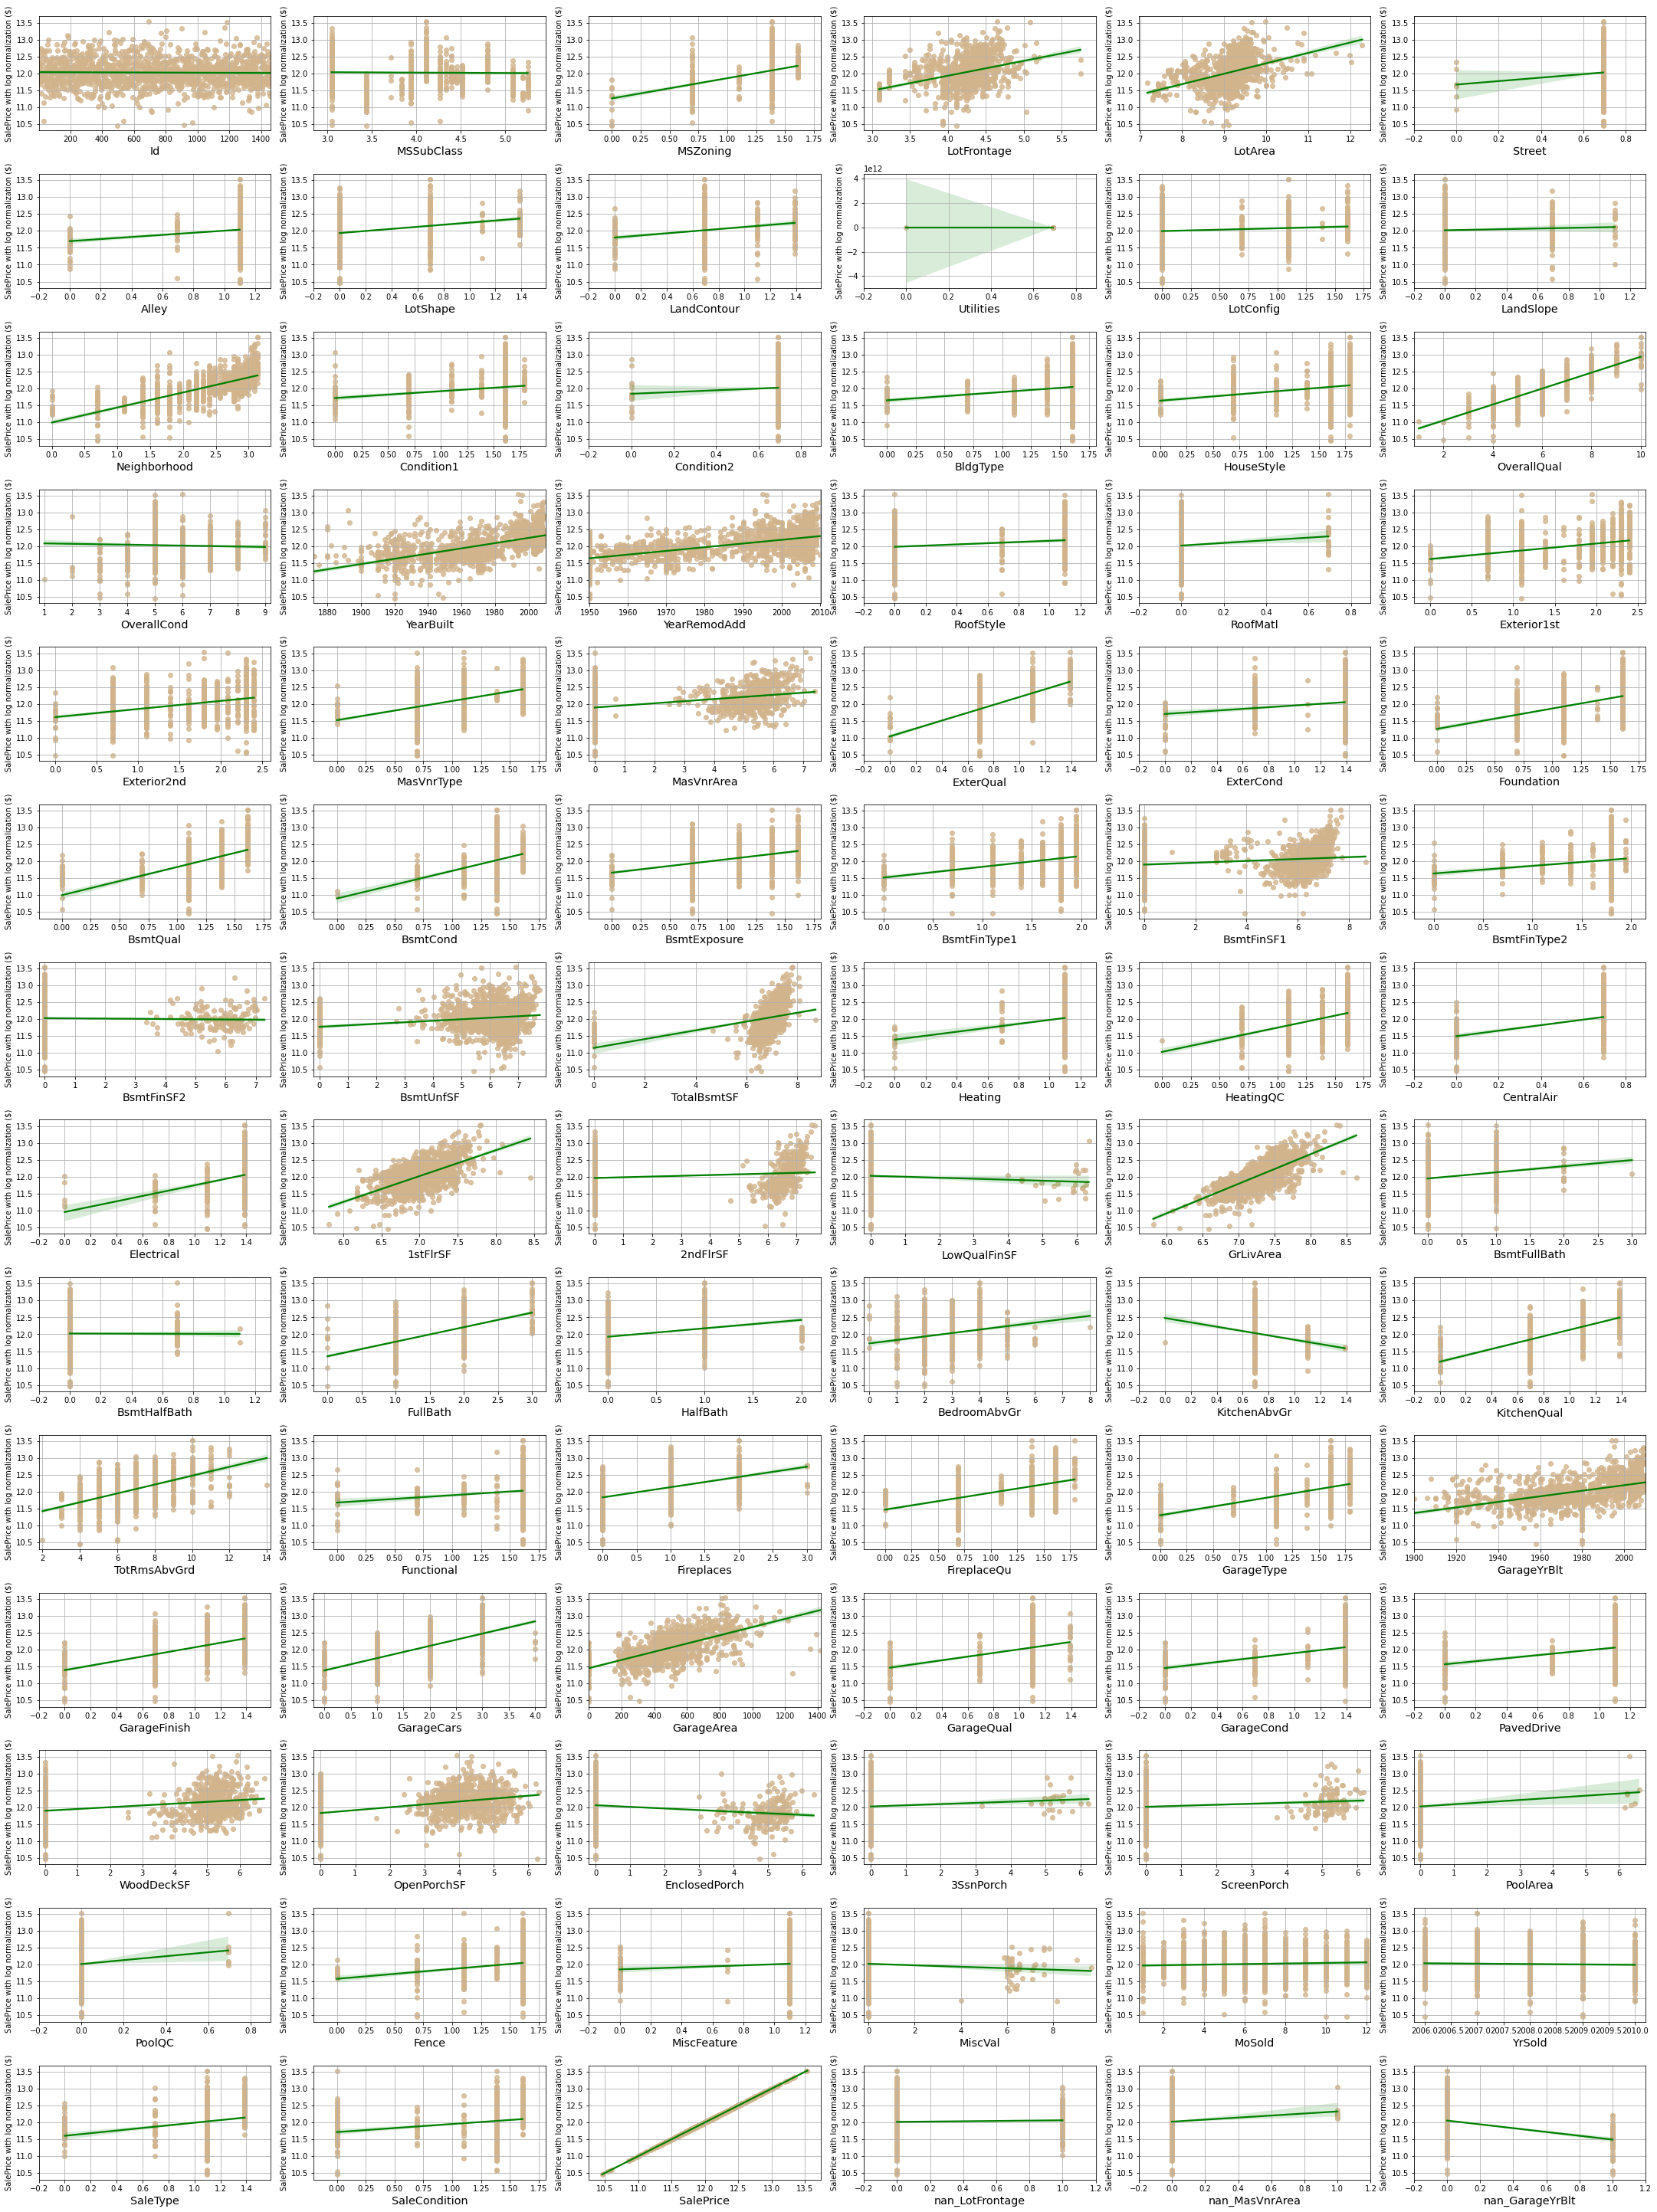

In [36]:
# Scatter plots for all features after log transformation
grh_per_row = 6
fig, ax = plt.subplots(len(train_copy.columns)//grh_per_row, grh_per_row, figsize=(30, 40))

for count, (feature, axes) in enumerate(zip(train_copy.columns, ax.flatten())):
    sns.regplot(x=feature, y='SalePrice', data=train_copy, ax=axes, color='green', scatter_kws={'color': 'tan'})
    axes.set_xlabel(feature, fontsize='x-large')
    axes.set_ylabel("SalePrice with log normalization ($)")
    axes.set_xlim(left=train_copy[feature].min()-0.2, right=train_copy[feature].max()+0.2)
    axes.grid()

plt.tight_layout()
plt.show()

### Observations after feature scaling
- The normality and homoskedasticity of residuals (hence for dependent variable too) improved a lot. 
- As discussed, a few features' slope improved. need some outlier removal.
- As discussed, a few features' slopes are impacted by the zero values significantly: 'MasVnrArea','BsmtFinSF1','TotalBsmtSF','2ndFlrSF','WoodDeckSF','EnclosedPorch','ScreenPorch'

# <a id="16"></a>

<div style="text-align: center; background-color: #c1cbd7; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 2.5: Remove Outliers </h2>
</div>

In [37]:
# As discussed, we need to remove some outliers
train_copy.drop(train_copy[(train_copy['LotFrontage']>5)].index, inplace=True)
train_copy.drop(train_copy[(train_copy['LotArea']>11.5) ].index, inplace=True)
train_copy.drop(train_copy[(train_copy['YearBuilt']<1900) & (train_copy['SalePrice']>12.4)].index, inplace=True)
train_copy.drop(train_copy[(train_copy['1stFlrSF']>8) & (train_copy['SalePrice']<12.5)].index, inplace=True)

train_copy.shape

(1441, 87)

# <a id="17"></a>

<div style="text-align: center; background-color: #c1cbd7; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 2.6: Final data touch up  </h2>
</div>

In [38]:
#Drop "Id" and seperate independent variables vs. target variables for training data
y_train=train_copy['SalePrice']
# X_train_copy=train_copy.drop(["SalePrice","Id","YearBuilt","YearRemodAdd","YrSold","MoSold","MiscVal","OverallCond","KitchenAbvGr","Utilities"], axis=1)
X_train=train_copy.drop(["SalePrice","Id","YearBuilt","YearRemodAdd","YrSold"], axis=1)

#Drop "Id" from testing data
# X_test_copy=test_copy.drop(["Id","YearBuilt","YearRemodAdd","YrSold","MoSold","MiscVal","OverallCond","KitchenAbvGr","Utilities"], axis=1)
X_test=test_copy.drop(["Id","YearBuilt","YearRemodAdd","YrSold"], axis=1)

print(X_train.shape, X_test.shape)

(1441, 82) (1459, 90)


# <a id="18"></a>
<div style="text-align: center; background-color: #544e70; font-size:80%; font-family: Comic Sans MS; padding: 5px;border-radius:10px 10px; color: white;">
    <h1>Part 3: Model Building and Training 🗿 </h1>
</div>

# <a id="19"></a>

<div style="text-align: center; background-color: #c1cbd7; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 3.1: Base Line Model - Linear Regression without regularizations </h2>
</div>

Linear regression score for iteration 0:  0.01274186659466501
Linear regression score for iteration 1:  0.01286574064864973
Linear regression score for iteration 2:  0.01320811374761884
Linear regression score for iteration 3:  0.013431432059054872
Linear regression score for iteration 4:  0.012534271525164639
Linear regression score for iteration 5:  0.013472576160848218
Linear regression score for iteration 6:  8.60611488549363e+20
Linear regression score for iteration 7:  0.015740242744745316
Linear regression score for iteration 8:  0.012724095294782897
Linear regression score for iteration 9:  0.018078034805581605
Linear regression score for iteration 10:  0.010954939804209387
Linear regression score for iteration 11:  8.211383733777249e+20
Linear regression score for iteration 12:  3.4978297316485555e+21
Linear regression score for iteration 13:  0.015162637027943297
Linear regression score for iteration 14:  0.010849007847817966
Linear regression score for iteration 15:  0.01317

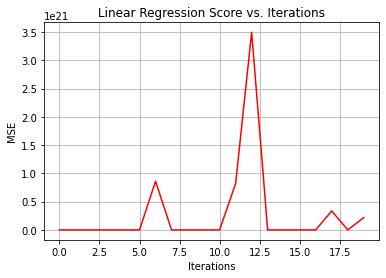

In [39]:
# Train test split
lr_scores=[]
iterations=20
for i in range(iterations):
    X_train_copy, y_train_copy = X_train.copy(), y_train.copy()
    X_train_train,x_val,y_train_train,y_val = train_test_split(X_train_copy, y_train_copy, test_size=0.2,random_state=i+200)
    steps=[('my scaler', StandardScaler()),('my model', LinearRegression())]
    my_pipeline = Pipeline(steps)
    my_pipeline.fit(X_train_train, y_train_train)
    y_pred = my_pipeline.predict(x_val)
    lr_socre = mean_squared_error(y_val, y_pred)
    lr_scores.append(lr_socre)
    print(f'Linear regression score for iteration {i}: ',lr_socre )
    
# Plot lr scores by iterations
plt.plot(range(iterations), lr_scores, color='red')
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('Linear Regression Score vs. Iterations')
plt.grid(True)
plt.show()    

### Baseline linear regression model performance
- As expected due to multicollinearity issues, the model exhibits **high instability**, with the mean squared error (MSE) fluctuating between across most iterations. We even see some crazy high MSE numbers! This could be attributed to **both multicollinearity(unstable $\beta_js$ solution) and overfitting** (the variability in training versus validation data for that particular iteration). 

### Tuning Plan:¶
- We probably cannot trust this model and should just reject this model for final prediction.
- As discussed, Lasso or Ridgeregularization could help. 

# <a id="20"></a>

<div style="text-align: center; background-color: #c1cbd7; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 3.2: Model Tuning - Linear Regression with Lasso and Ridge regularizations </h2>
</div>

In [40]:
#Create a function to get scores. This is a helper function for mode_score function
def get_score(model, scaler, alpha):
        my_pipeline=Pipeline(steps=[('My scaler', scaler()), ('My classifier',model(alpha =alpha))])
        cv = KFold(n_splits=5, shuffle=True, random_state=100)
        scores = -1 * cross_val_score(my_pipeline, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
        return  scores.mean()

In [41]:
def model_scores(models, scalers, alphas_lists):
    best_scores = {}
    
    best_alphas =[]
    fig, axes = plt.subplots(1, len(models), figsize=(30, 3))
    # Iterate through different models
    for i, (model, scaler, alphas) in enumerate(zip(models, scalers, alphas_lists), 0):
            results = {}
            best_score = float('inf')
            best_alpha = 0
            # get best scores and hyper-parameters for each model
            for j, alpha in enumerate(alphas, 1):
                score = get_score(model=model, scaler=scaler, alpha=alpha)
                
                if score < best_score:
                    best_score = score
                    best_alpha = alpha
                    
                results[f"alpha={alpha}"] = score
                
            print(f"\nBest alpha for {model.__name__} with {scaler.__name__}: alpha={best_alpha} with score of {best_score}")
            ax = axes[i]
            ax.plot(list(results.keys()), list(results.values()), markersize=5, marker="o", color="royalblue")
            ax.set_title(f"{model.__name__} - {scaler.__name__}")
            ax.set_xlabel("Alpha")
            ax.set_ylabel("MSE Score")
                    
            best_scores[str(model.__name__)+str(scaler.__name__)] = best_score
            
            best_alphas.append(best_alpha )
    plt.tight_layout()
    plt.show()
    # return the best scores and best alphas for each model
    return best_scores, best_alphas


In [42]:
def pred_vs_actual_lr_regplot(models, scalers, alphas_list):
    X_train_train, x_val, y_train_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=123)
    
    plt.figure(figsize=(30, 5))
    for i, (model, scaler, alpha) in enumerate(zip(models, scalers, alphas_list), 1):
        my_pipeline = Pipeline(steps=[('My scaler', scaler()), ('My classifier', model(alpha=alpha))])
        my_pipeline.fit(X_train_train, y_train_train)
        y_pred = my_pipeline.predict(x_val) 

        plt.subplot(1, 4, i)
        sns.regplot(x=y_val, y=y_pred, color='green', scatter_kws={'color': 'tan'}, label='regression line - predictions')
        plt.plot(y_val, y_val, color='fuchsia', label='Actual Values')
        plt.xlabel("Actual Sale Price (log) $ ")
        plt.ylabel("Predicted Sale Price (log) $ ")
        plt.title(f'{model.__name__}, {scaler.__name__} - Alpha: {alpha}')
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()


In [43]:
def plot_results_over_iterations(models, scalers, alphas_list,iterations=20):
    plt.figure(figsize=(30, 3))
    scores=[]
    for i, (model, scaler, alpha) in enumerate(zip(models, scalers, alphas_list), 1):
        scores=[]
        for j in range(iterations):
            X_train_train,X_val,y_train_train,y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100+j)
            my_pipeline = Pipeline(steps=[('My scaler', scaler()), ('My classifier', model(alpha=alpha))])
            my_pipeline.fit(X_train_train,  y_train_train)
            y_pred = my_pipeline.predict(X_val) 
            score = mean_squared_error(y_val, y_pred)
            scores.append(score)
            lowest_score = min(scores)
            highest_score = max(scores)


        # Plot scores over iterations
        plt.subplot(1, 4, i)
        plt.plot(range(iterations),scores)
        plt.xlabel("Iterations")
        plt.ylabel("MSE")
        plt.title(f'{model.__name__},{scaler.__name__}-Alpha: {round(alpha,3)}, lowest: {round(lowest_score,4)}, highest: {round(highest_score,4)}')        


Best alpha for Lasso with StandardScaler: alpha=0.002976351441631319 with score of 0.013895746775708744

Best alpha for Lasso with MinMaxScaler: alpha=0.0002734274456165236 with score of 0.013877356028549703

Best alpha for Ridge with StandardScaler: alpha=56.57591401470916 with score of 0.014167642838093675

Best alpha for Ridge with MinMaxScaler: alpha=1.0 with score of 0.014204131846403217


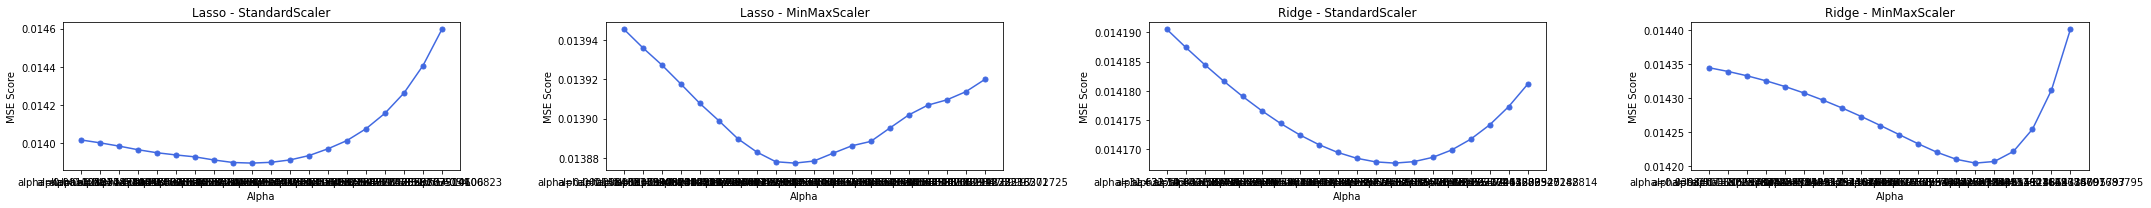

In [44]:
# Grid Search to find best hyper-parameters 
models=[Lasso,Lasso,Ridge,Ridge]
scalers=[StandardScaler,MinMaxScaler,StandardScaler,MinMaxScaler]
alphas_lists=[np.logspace (-3,-2, num=20),np.logspace(-3.8,-3.3,num=20),np.logspace (1.5,1.9, num=20),np.logspace (-1.4,0.5, num=20)]
scores, alphas= model_scores(models=models,scalers=scalers,  alphas_lists=alphas_lists)

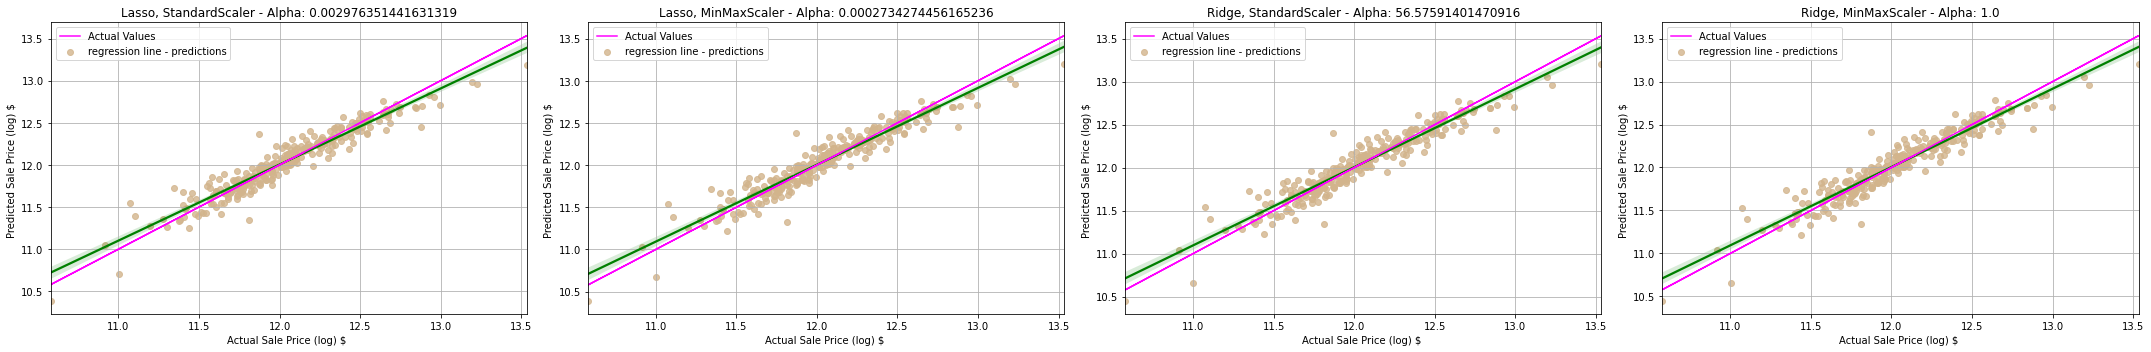

In [45]:
# choose the best hyper-parameters and see plot results of best models
models=[Lasso,Lasso,Ridge,Ridge]
scalers=[StandardScaler,MinMaxScaler,StandardScaler,MinMaxScaler]
alphas_list= alphas
pred_vs_actual_lr_regplot(models=models,scalers=scalers,  alphas_list= alphas_list )

### Actual sale prices vs. model predictions observations:
- The results of Lasso and Ridge regression exhibit similar patterns. In the plots, the pink line represents the actual prices, while the green line represents the regression line based on predictions. Across all four models, the **regression lines consistently exhibit a slightly smaller slope than the actual price lines**. This suggests that, in general, **the models may predict prices in the higher range to be lower and prices in the lower range to be higher**. 
- There are noticeable outliers in both the higher and lower tails of the plots. For **outliers in the very high price range, the actual values are significantly below the regression lines**. Consequently, the models tend to overestimate the prices for these outliers. However, this behavior is acceptable, particularly for a linear regression model, as it avoids excessively lowering the slope to accommodate outliers.
- Overall, while the models demonstrate reasonable predictive performance, there is **room for improvement, particularly in handling outliers and fine-tuning the slope to better align with the actual prices**

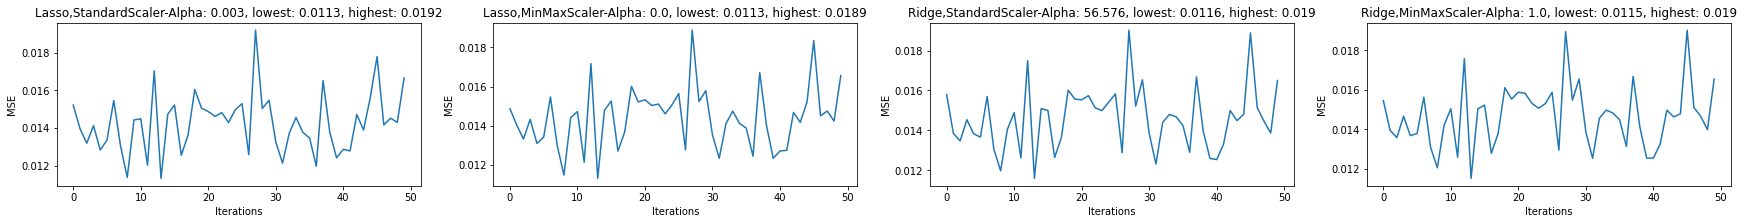

In [46]:
# Lass and Ridge models (with Standard and MinMax Scaler) MSE over iterations
plot_results_over_iterations(models=models,scalers=scalers,  alphas_list= alphas_list, iterations=50)

### Lasso and Ridge Feature Coefficient Observations:
- Upon applying regularization, the **stability of the results notably improves compared to linear regression across all four models**. With 50 iterations, the fluctuations in mean squared error (MSE) are consistently around 0.004 for all models. 

### Next Step Tuning/Model Selection
- While Lasso and Ridge models have shown improvements over the basic linear regression model on model stability (due to overfitting and multicollinearity), they still face challenges in handling the complexity of the data. These challenges include the influence of large non-linearities (mostly caused by large amounts of zero values in data) and the inability to effectively handle outliers due to the inherent linearity of the models.

- Unlike linear models that fit lines to the data, **tree models partition the data into smaller regions and use averages for prediction within each region**. This characteristic of tree models **might well-suited for datasets with non-linear relationships**. In the next step,  let's start to **explore tree-based models**!

# <a id="21"></a>

<div style="text-align: center; background-color: #c1cbd7; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 3.3: Model Tuning - Tree models (Decision Tree, Random Forest, Gradient Boost, XGBoost) </h2>
</div>

#### Decision Trees
- Decision trees are very prone to overfitting, especially when they are deep or have too many branches. With so many features in our data, it's unlikely it will be a good model for our data. However, it allow us to use it to peek in the structure of one tree. Sound fun! Let's look! :)

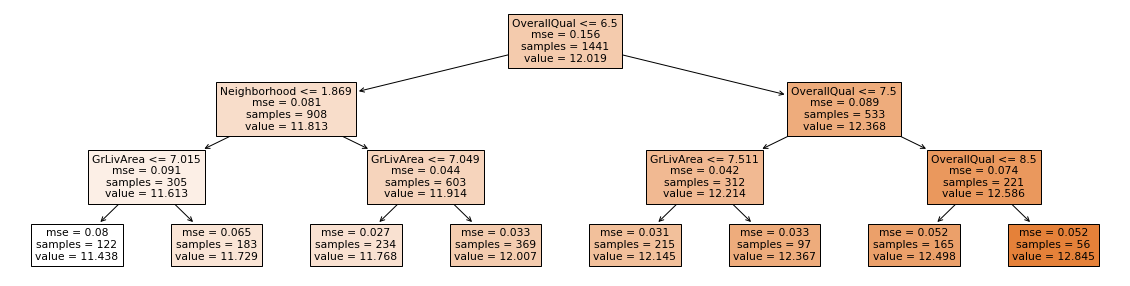

In [47]:
#First let's take a look at a simple decision tree. I only used max_depth of 3 so I can take visualize it clearly here
#from sklearn.tree import DecisionTreeRegressor
dt_regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = dt_regr.fit(X_train, y_train)

fig = plt.figure(figsize=(20,5))
_ = tree.plot_tree(dt_regr, feature_names=X_train.columns, filled=True)

#### Random Forest

Random Forest is built based on decision trees but it can effectively reduce overfitting and improve model generalization. The essense is the "BAGging" ensembling method. Here is how it works:

- **"B" stands for bootstrap sampling**: Random Forest utilizes the bootstrap method, which involves creating multiple subsets of the original dataset by sampling with replacement. Additionally, random feature selection occurs during this process.
- By employing bootstrap sampling and random feature selection, Random Forest builds many trees.
- **"AG" stands for aggregation**: During the prediction phase, Random Forest aggregates predictions from all trees to make a final prediction on samples not selected in bootstrap (called "out of bag" samples).

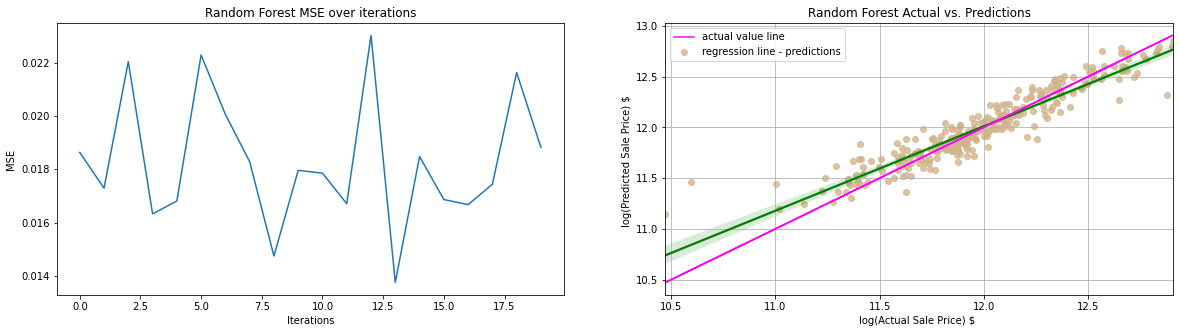

In [48]:
#Random Forest
plt.figure(figsize=(20,5))

iterations=20
rf_scores=[]
for i in range(iterations):
    X_train_train,X_val,y_train_train,y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100+i)
    rf=RandomForestRegressor()
    rf.fit(X_train_train, y_train_train)
    y_pred=rf.predict(X_val)
    mse_test = mean_squared_error(y_val, y_pred)
    rf_scores.append(mse_test)
    
# Plot RF performance over iterations  
plt.subplot(1,2,1)
plt.plot(range(iterations), rf_scores)
plt.title('Random Forest MSE over iterations')
plt.xlabel("Iterations")
plt.ylabel("MSE ")
scores["RF"]=rf_scores[0] 

# Plot predicted vs. actual sale prices
X_train_train,X_val,y_train_train,y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100)
rf=RandomForestRegressor()
rf.fit(X_train_train, y_train_train)
y_pred=rf.predict(X_val)
plt.subplot(1,2,2)
sns.regplot(x=y_val, y=y_pred, color='green', scatter_kws={'color': 'tan'}, label='regression line - predictions')
plt.plot(y_val, y_val, color='fuchsia', label='actual value line')
plt.xlabel("log(Actual Sale Price) $ ")
plt.ylabel("log(Predicted Sale Price) $ ")
plt.title('Random Forest Actual vs. Predictions')
plt.legend()
plt.grid(True)


### Random Forest performance Observations:
- With 20 iterations, Random Forest demonstrates **relative stability**, with fluctuations in mean squared error (MSE) consistently around 0.009. While this MSE is slightly higher than that of Lasso and Ridge, it remains within a reasonable range, indicating robust performance.
-  The relationship between actual and predicted values in Random Forest exhibits similarities to Lasso and Ridge. Notably, the predicted values tend to have a slightly smaller slope than the actual prices. This suggests that the models may **predict higher prices to be lower and lower prices to be higher, reflecting a systematic bias in predictions**. 
- There are noticeable outliers in both the higher and lower tails of the plots. For **outliers in the very high price range, the actual values are significantly below the regression lines**. Consequently, the models tend to overestimate the prices for these outliers. 
- Similar to Lasso and Ridge, there are noticeable outliers in both the higher and lower tails of the plots. In the **very high price range**, the actual values tend to fall significantly below the regression lines, indicating that the models tend to **overestimate** prices for these outliers. 
- In the lower price range though, **Random Forest appears to predict a few prices much higher than the actual values compared to Lasso and Ridge**. While the exact reason for this behavior is not fully understood, it may be attributed to Random Forest's averaging mechanism, which could amplify outliers in this range.
### Next Step Tuning/Model Selection
- It appears that Random Forest, Lasso, and Ridge models are struggling with outliers in the data. While outliers are typically considered as minority instances, there are cases where they form distinct patterns of their own. In our dataset, **houses at much higher or lower price ranges, considered as 'outliers', might exhibit unique characteristics worth capturing**. What works for the majority of the data may not necessarily apply to these outliers.
- **Gradient Boosting Model (GBM) uses boosting ensemble method instead of Bagging. It sequentially fitting new models to the residuals of previous models. So, it's more sensitive to outliers compared to Random Forest** and previous models. However, note this sensitivity could potentially lead to overfitting to the noise present in the data, ultimately resulting in poorer generalization performance.



#### Gradient Boosting

In [49]:
#Use Random Search to tune Gradient Boost
num_leaves=list(range(4,6))
learn_rate_list=[0.003,0.005]
n_estimators_list=[5000,6000]
max_bin=[200,250]
bagging_fraction=np.linspace(0.7,0.8,5)
bagging_freq=[5,6]
bagging_seed=[7,8]
feature_fraction=np.linspace(0.15,0.25,5)
feature_seed=[6,7]

params_grid={"num_leaves":num_leaves,
        "learning_rate":learn_rate_list,
        "n_estimators":  n_estimators_list,
        "max_bin": max_bin,
        "bagging_fraction":bagging_fraction,
        "bagging_freq":bagging_freq,
        "bagging_seed":bagging_seed,
        "feature_fraction":feature_fraction,
        "feature_fraction_seed":feature_seed  }
random_GBM_class=RandomizedSearchCV(estimator = LGBMRegressor(objective='regression',                                  
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       random_state=100),
                              param_distributions=params_grid,
                              n_iter=40, 
                              scoring='neg_mean_squared_error',
                              cv=2,
                              refit=True, 
                              return_train_score=True,
                                   n_jobs=-1)
random_GBM_class.fit(X_train,y_train)

[LightGBM] [Warning] bagging_fraction is set=0.725, subsample=1.0 will be ignored. Current value: bagging_fraction=0.725
[LightGBM] [Warning] feature_fraction is set=0.15, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


RandomizedSearchCV(cv=2,
                   estimator=LGBMRegressor(feature_fraction_seed=7,
                                           objective='regression',
                                           random_state=100, verbose=-1),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'bagging_fraction': array([0.7  , 0.725, 0.75 , 0.775, 0.8  ]),
                                        'bagging_freq': [5, 6],
                                        'bagging_seed': [7, 8],
                                        'feature_fraction': array([0.15 , 0.175, 0.2  , 0.225, 0.25 ]),
                                        'feature_fraction_seed': [6, 7],
                                        'learning_rate': [0.003, 0.005],
                                        'max_bin': [200, 250],
                                        'n_estimators': [5000, 6000],
                                        'num_leaves': [4, 5]},
                   return_train_score=True, sco

In [50]:
#Take a look at the best score and the best parameters
best_score = -1*random_GBM_class.best_score_
scores["GB"] =best_score
print(f"best score is {best_score}")
print(f"best parameters are {random_GBM_class.best_params_}")

best score is 0.013552701215292793
best parameters are {'num_leaves': 4, 'n_estimators': 6000, 'max_bin': 200, 'learning_rate': 0.005, 'feature_fraction_seed': 7, 'feature_fraction': 0.15, 'bagging_seed': 8, 'bagging_freq': 6, 'bagging_fraction': 0.725}


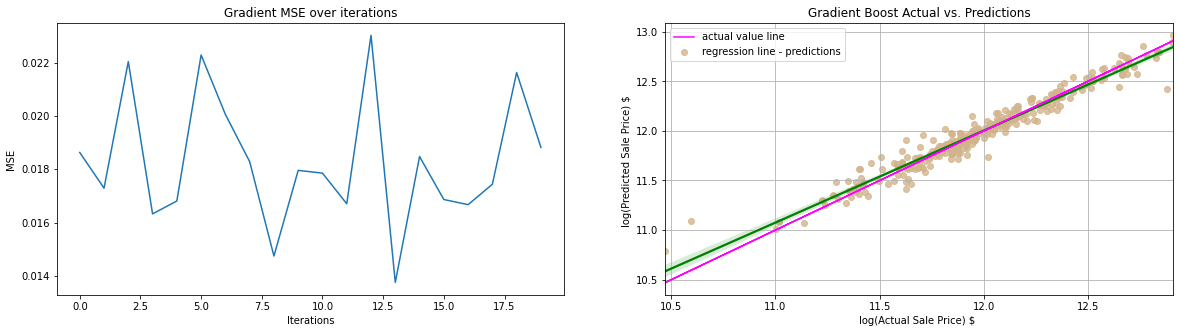

In [51]:
# Let's check Gradient Boost stability and do some visulization on prections
plt.figure(figsize=(20,5))

iterations=20
gb_scores=[]
for i in range(iterations):
    X_train_train,X_val,y_train_train,y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100+i)
    y_pred=random_GBM_class.predict(X_val)
    mse_test = mean_squared_error(y_val, y_pred)
    gb_scores.append(mse_test)
    
# Plot RF performance over iterations  
plt.subplot(1,2,1)
plt.plot(range(iterations), rf_scores)
plt.title('Gradient MSE over iterations')
plt.xlabel("Iterations")
plt.ylabel("MSE ")

# Plot predicted vs. actual sale prices
X_train_train,X_val,y_train_train,y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100)
y_pred=random_GBM_class.predict(X_val)
plt.subplot(1,2,2)
sns.regplot(x=y_val, y=y_pred, color='green', scatter_kws={'color': 'tan'}, label='regression line - predictions')
# plt.xlim(13, 14)  
plt.plot(y_val, y_val, color='fuchsia', label='actual value line')
plt.xlabel("log(Actual Sale Price) $ ")
plt.ylabel("log(Predicted Sale Price) $ ")
plt.title('Gradient Boost Actual vs. Predictions')
plt.legend()
plt.grid(True)
plt.show()

### Gradient Boost performance Observations:
- With 20 iterations, Gradient Boost demonstrates **relative stability**, with fluctuations in mean squared error (MSE) consistently around 0.008. While this MSE is slightly higher than that of Lasso and Ridge, it remains within a reasonable range, indicating robust performance.
- The predicted values still has a slightly smaller slope than the actual price but so far, the difference seem to be the smallest among previous models. This suggests that the GBM in general **has a lower systematic bias than previous models**. 
- There are still noticeable outliers in both the higher and lower tails of the plots that the model didn't predicted correctly but the over or under estimated sample numbers seem to be the lowest among all previous models.

### Next Step Tuning/Model Selection
- It appears GBM is the best of all models so far. XGBoost is another popular tree models using boosting ensembling method. It usually perform really well on various types of data. There are a few advantage over GBM. Two of them are:
  - Incorporates advanced regularization techniques, such as Ridge and Lasso regularization to which help prevent overfitting 
  - It is significantly faster than traditional Gradient Boosting implementationsEefficiency because it supports parallel processing, making.
- However, it may or may not perform better than GBM because our models already perform well on the majority of the data. Here, what we mainly want to improve is the performance on those 'outliers'. 

Let's see how XGBoost performs next!


### XGBoost

In [52]:
import warnings
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Suppress warnings
warnings.filterwarnings('ignore')

max_depth_list = [4, 5]
learn_rate_list = [0.005, 0.01]
n_estimators_list = [ 7000, 8000]
colsample_bytree_list = [0.9]
min_child_weight_list = [0, 1]
subsample_list = [0.9, 1]
alpha_list = [0, 1, 2]
lambda_list = [7, 8]
reg_alpha_list = [0.00005, 0.00006]
gamma_list = [0.5, 0.6]

params_grid = {"max_depth": max_depth_list,
               "learning_rate": learn_rate_list,
               "n_estimators": n_estimators_list,
               "colsample_bytree": colsample_bytree_list,
               "min_child_weight": min_child_weight_list,
               "subsample": subsample_list,
               "alpha": alpha_list,
               "lambda": lambda_list,
               "reg_alpha": reg_alpha_list,
               "gamma": gamma_list}

random_XGBst_class = RandomizedSearchCV(estimator=XGBRegressor(objective='reg:squarederror',
                                                               nthread=-1,
                                                               scale_pos_weight=1,
                                                               seed=27,
                                                               random_state=42),
                                        param_distributions=params_grid,
                                        n_iter=20,
                                        scoring='neg_mean_squared_error',
                                        cv=2,
                                        refit=True,
                                        return_train_score=True)

random_XGBst_class.fit(X_train, y_train)


RandomizedSearchCV(cv=2,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          tree_method=None,
                                          validate_parameters=None,
                                          verbosity=None),
   

In [53]:
#Take a look at the best score and the best parameters
best_score = -1*random_XGBst_class.best_score_
scores['XGB']=best_score
print(f"best score is {best_score}")
print(f"best parameters are {random_XGBst_class.best_params_}")

best score is 0.02051650789861076
best parameters are {'subsample': 0.9, 'reg_alpha': 6e-05, 'n_estimators': 8000, 'min_child_weight': 0, 'max_depth': 4, 'learning_rate': 0.01, 'lambda': 7, 'gamma': 0.5, 'colsample_bytree': 0.9, 'alpha': 2}


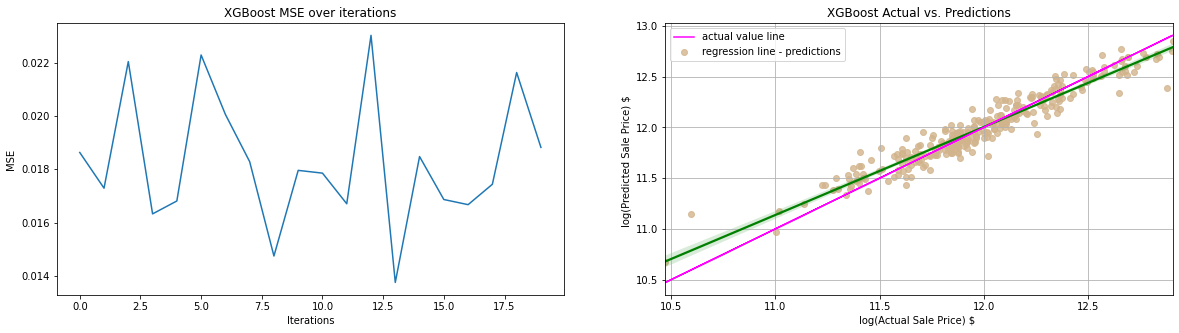

In [54]:
# Let's check XGBoost stability and do some visulization on prections
plt.figure(figsize=(20,5))

iterations=20
xgb_scores=[]
for i in range(iterations):
    X_train_train,X_val,y_train_train,y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100+i)
    y_pred=random_XGBst_class.predict(X_val)
    mse_test = mean_squared_error(y_val, y_pred)
    xgb_scores.append(mse_test)
    
# Plot RF performance over iterations  
plt.subplot(1,2,1)
plt.plot(range(iterations), rf_scores)
plt.title('XGBoost MSE over iterations')
plt.xlabel("Iterations")
plt.ylabel("MSE ")

# Plot predicted vs. actual sale prices
X_train_train,X_val,y_train_train,y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=100)
y_pred=random_XGBst_class.predict(X_val)
plt.subplot(1,2,2)
sns.regplot(x=y_val, y=y_pred, color='green', scatter_kws={'color': 'tan'}, label='regression line - predictions')
plt.plot(y_val, y_val, color='fuchsia', label='actual value line')
plt.xlabel("log(Actual Sale Price) $ ")
plt.ylabel("log(Predicted Sale Price) $ ")
plt.title('XGBoost Actual vs. Predictions')
plt.legend()
plt.grid(True)

### Gradient Boost performance Observations:
- With 20 iterations, XGBoost demonstrates **relative stability**, with fluctuations in mean squared error (MSE) consistently around 0.008. This is almost the same as GBM. 
- XGBoost seems to be less effective in addressing the issue of predicted values having a slightly smaller slope than the actual prices than Gradient Boost, 

Overall, it could I didn't tune it to the best but surprisingly, **XGBoost doesn't seem to be superior than gradient boost any previous models in this case**. 

# <a id="22"></a>

<div style="text-align: center; background-color: #c1cbd7; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 3.3: Coefficients and Feature Importances </h2>
</div>

## Coefficients and Feature Importance
- **Coefficients of linear regression models** provide insights through coefficients indicating the strength and direction of feature associations. 
- Similarly, one key advantage of **tree-based models** is their interpretability. Tree models offer a unique perspective through **feature importance** analysis.
- Features with higher importance scores are deemed more influential in the decision-making process of the model, highlighting their relevance in predicting the target variable.
- Tree-based models can capture complex or nonlinear interactions between features, enabling them to uncover patterns and dependencies that may not be captured by linear models.

Let's see the resulting feature coefficients from linear regression models and feature importance of trees models next!


In [55]:
def get_top_features(model, scaler, alpha, top_n=10):
    # Train the model
    my_pipeline = Pipeline(steps=[('My scaler', scaler()), ('My classifier', model(alpha=alpha))])
    my_pipeline.fit(X_train, y_train)
    
    # Retrieve the coefficients
    coefficients = my_pipeline.named_steps['My classifier'].coef_
    feature_names = X_train.columns
    
    # Get the indices of the top features based on absolute coefficient values
    top_indices = np.argsort(np.abs(coefficients))[::-1][:top_n]
    
    # Get the top features and their coefficients
    top_features = [feature_names[i] for i in top_indices]
    top_coefficients = [coefficients[i] for i in top_indices]
    
    return top_features, top_coefficients

lasso_top_features_l=[]
lasso_top_coefficients_l=[]
for i, (model, scaler, alpha) in enumerate(zip(models, scalers, alphas_list), 1):
    lasso_top_features, lasso_top_coefficients = get_top_features(model, scaler,  alpha)
    lasso_top_features_l.append(lasso_top_features)
    lasso_top_coefficients_l.append(lasso_top_coefficients)

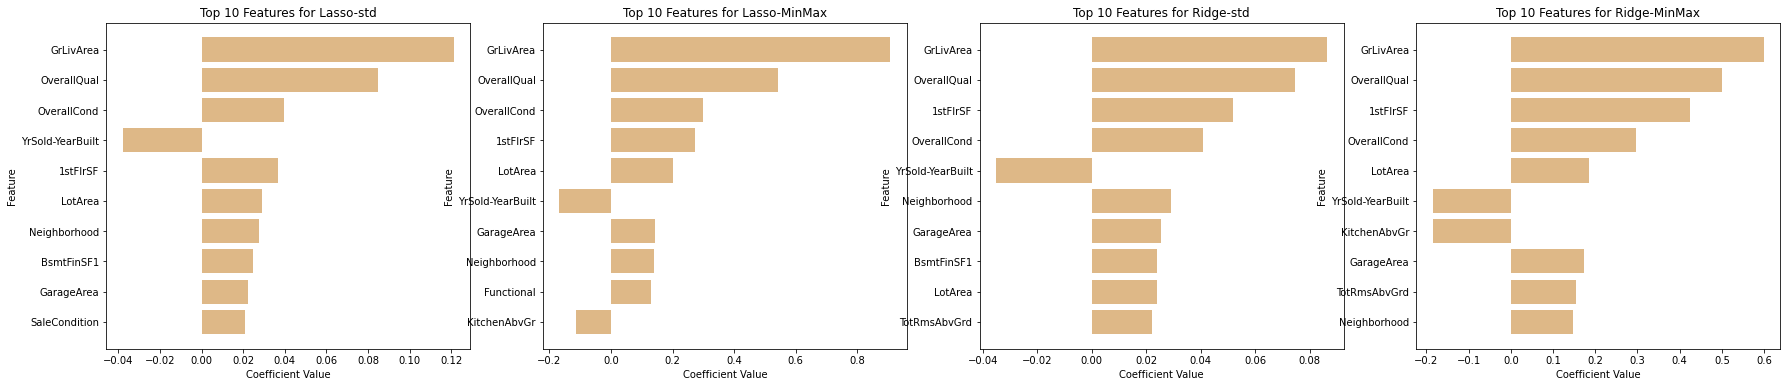

In [56]:
def plot_top_features(top_features_l, top_coefficients_l, models):
    plt.figure(figsize=(30, 6))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        plt.barh(top_features_l[i], top_coefficients_l[i], color='burlywood')
        plt.xlabel('Coefficient Value')
        plt.ylabel('Feature')
        plt.title(f'Top 10 Features for {models[i]}')
        plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
    plt.show()

# Plot top features for Lasso regression
plot_top_features(lasso_top_features_l, lasso_top_coefficients_l, ['Lasso-std','Lasso-MinMax','Ridge-std','Ridge-MinMax'])


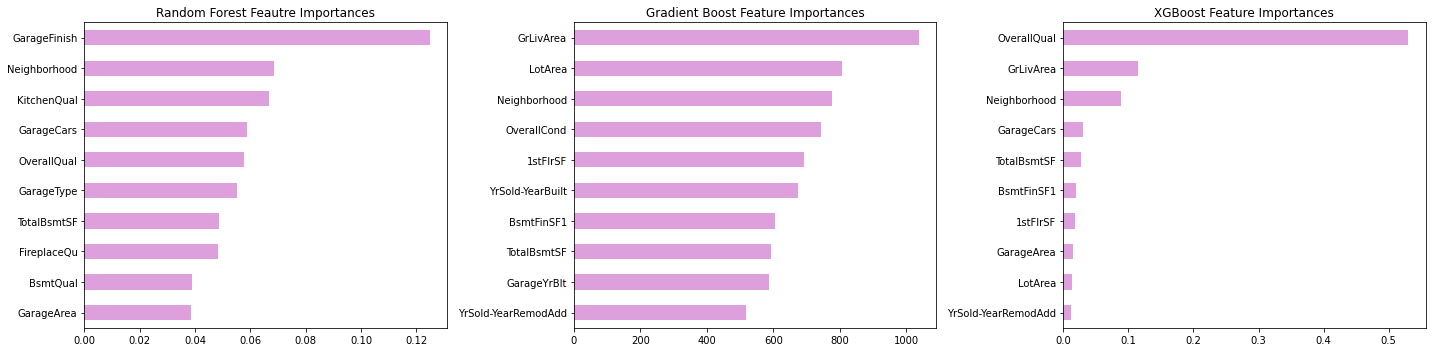

In [57]:
# Plot feature importance
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
# Random Forest feature importances
coef = pd.Series(data=rf.feature_importances_, index = X_train.columns)
imp_coef =coef.sort_values().tail(10)
imp_coef.plot(kind = "barh", color="plum")
axes[0].set_title("Random Forest Feautre Importances")

# Gradient Boost feature importances
coef = pd.Series(data=random_GBM_class.best_estimator_.feature_importances_, index=X_train.columns)
imp_coef = coef.sort_values().tail(10)
imp_coef.plot(kind="barh", color="plum", ax=axes[1])
axes[1].set_title("Gradient Boost Feature Importances")

# XGBoost feature importances
coef = pd.Series(data=random_XGBst_class.best_estimator_.feature_importances_, index=X_train.columns)
imp_coef = coef.sort_values().tail(10)
imp_coef.plot(kind="barh", color="plum", ax=axes[0])
axes[2].set_title("XGBoost Feature Importances")
plt.tight_layout()
plt.show()


### Feature Coefficients and Feature Importance Observations:

- The results obtained from Lasso and Ridge regression models exhibit reasonable behavior. Notably, the **Ridge models consistently include 'TotRmsAbvGrd' as one of the top ten highest coefficient predictors, whereas Lasso models do not**. This discrepancy may be attributed to the high correlation (0.85) between 'TotRmsAbvGrd' and 'GrLivArea'. As previously discussed, Lasso regularization tends to enforce sparsity by driving coefficients of correlated features towards zero. Consequently, 'TotRmsAbvGrd' may have its coefficient effectively reduced to zero in Lasso models. In contrast, Ridge regularization shrinks the coefficients of correlated features more uniformly, leading to the retention of 'TotRmsAbvGrd' as a significant predictor in Ridge models.
- It's important to recognize that while the **coefficients** obtained from Lasso and Ridge regression models **imply association** between predictors and the target variable, they **do not establish causality**. Instead, they offer valuable insights into the strength and direction of association within the context of the model.
- For tree models, our "star" performer, GBM, exhibits feature importance most similar to linear regression model coefficients. This suggests that GBM may be more reliable in capturing the nuanced relationships between features and the target variable. However, it's essential to note that tree models work differently than linear models, as they can capture non-linear and complex relationships.
- Also, notice in GBM, the feature importance score for 'YrSold-YearBuilt' does not exhibit negative importance. Unlike linear regression coefficients, which directly indicate the direction of feature effects, feature importance scores in tree-based models provide a relative ranking of feature importance. Consequently, 'YrSold-YearBuilt' may still be considered an important predictor in GBM, despite the lack of a negative importance score.


# <a id="23"></a>

<div style="text-align: center; background-color: #c1cbd7; font-size:70%; font-family: Comic Sans MS; padding: 2px;border-radius:10px;">
    <h2>Part 3.4: Ensemble Method - model Stacking</h2>
</div>

- We've seen linear models with regularization can perform well when data are 'normal' while tree model like GBM in this case work better to catch the pattern of outliers. 
- In model stacking, predictions from multiple individual models are combined to produce a final prediction, typically using a weighted average or a more sophisticated meta-model trained on the predictions of the base models.
- Combining the predictions from different models using a weighted average, then summing the weighted predictions to obtain the final prediction.
- This approach leverages the strengths of multiple models and can often result in improved predictive performance compared to any single model alone. It can help mitigate the weaknesses of individual models and provide more robust predictions, especially when the individual models have different biases or are sensitive to different aspects of the data.


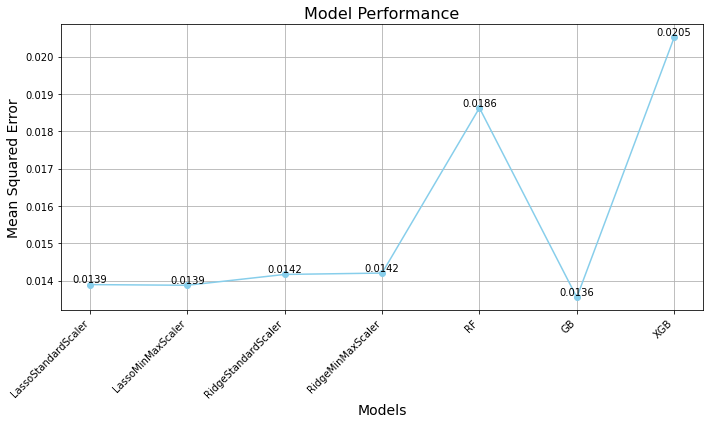

In [58]:
# First, let's recall the scores from models we've trained so far and plot scores
plt.figure(figsize=(10, 6))
plt.plot(scores.keys(), scores.values(), marker='o', color='skyblue', linestyle='-')
plt.xlabel('Models', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.title('Model Performance', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Add numerical scores
for model, score in scores.items():
    plt.text(model, score, f'{score:.4f}', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()

In [59]:
# Check columns in only test or train dataset
cols_in_test_only = list(set(X_test.columns) - set(X_train.columns))
cols_in_train_only =  list(set(X_train.columns)-set(X_test.columns) )
print("In test set only: ", cols_in_test_only)
print("In train set only: ",cols_in_train_only)

In test set only:  ['nan_BsmtFinSF2', 'nan_TotalBsmtSF', 'nan_BsmtFinSF1', 'nan_GarageCars', 'nan_BsmtUnfSF', 'nan_GarageArea', 'nan_BsmtFullBath', 'nan_BsmtHalfBath']
In train set only:  []


In [60]:
# It seems the discrepancy is due to some testing data has more missing values
# Let's just only keep the common the columns
X_test=X_test[X_train.columns.intersection(X_test.columns)]

### Now let's combination our models for optimal performance!
- We've seen from our analysis that both **Gradient Boosting Machine and linear regression with regularization** perform well for **data in normal range**. We will use both for data in this range
- Moreover, BGM work exceptional well in handling data at both **high and low extremes**. We will **use more of BGM in this range**. 


In [61]:
#Predict using different models
X_train_train, X_val, y_train_train, y_val= train_test_split(X_train, y_train, test_size=0.2, random_state=123)

#Lasso with Standard Scaler
my_pipeline_ls=Pipeline(steps=[('My scaler', StandardScaler()), ('My classifier',Lasso(alpha = alphas[0]))])
my_pipeline_ls.fit(X_train_train,y_train_train)
y_pred_LS_train=my_pipeline_ls.predict(X_val)


#Random Forest
y_pred_RF_train=rf.predict(X_val)

#Gradient Boost
y_pred_GB_train=random_GBM_class.predict(X_val)

#XGBoost
y_pred_XGB_train=random_XGBst_class.predict(X_val)

# combine
y_pred_train = np.where((y_pred_GB_train > 12) | ((y_pred_GB_train > 11) & (y_pred_GB_train < 11.5)), 
                        0.1 * y_pred_LS_train + 0.9 * y_pred_GB_train, 
                        0.5 * y_pred_LS_train + 0.5 * y_pred_GB_train)

mse_test = mean_squared_error(y_val, y_pred_train)
print("MSE on validation set: ", mse_test)

MSE on validation set:  0.008571305423412093


Now let's retrain with all training data (no validation part taken out) and predict the testing set

In [62]:
#Lasso with Standard Scaler
my_pipeline_ls.fit(X_train,y_train)
y_pred_LS=my_pipeline_ls.predict(X_test)

#Gradient Boost
best_params = random_GBM_class.best_params_
best_GBM_model = LGBMRegressor(objective='regression', 
                            **best_params,
                            random_state=100)
best_GBM_model.fit(X_train, y_train)
y_pred_GB=best_GBM_model.predict(X_test)

# combine
y_pred = np.where((y_pred_GB > 12) | ((y_pred_GB > 11) & (y_pred_GB < 11.5)), 
                  0.1 * y_pred_LS + 0.9 * y_pred_GB, 
                  0.5 * y_pred_LS + 0.5 * y_pred_GB)



[LightGBM] [Warning] bagging_fraction is set=0.725, subsample=1.0 will be ignored. Current value: bagging_fraction=0.725
[LightGBM] [Warning] feature_fraction is set=0.15, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.15
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


<div style="background-color: #cecec0; padding: 10px;">
<span style="font-size: larger;">

### Model Tuning Progress and Performance Comparison summary: 🌱

- Linear Regression Models:
  - Unregularized Linear Regression: Highly unstable due to outliers and highly correlated features, leading to unreliable predictions.
  - Lasso and Ridge Regularization: Lasso and Ridge regularization stabilize linear models, addressing issues with outliers and correlated features.
  - Lasso with Standard Scaler slightly outperforms Ridge, but the difference may not be statistically significant.
- Tree Models:
  - Random Forest: While stable, Random Forest doesn't significantly outperform regularized linear models. Faces challenges with outliers and extreme housing prices, similar to linear models.
  - Gradient Boosting: Shows improvement over Random Forest and linear models. Successfully addresses issues with outliers and extreme housing prices, providing more accurate predictions across the data distribution.
  - XGBoost: Despite its advanced regularization techniques, XGBoost doesn't offer significant performance gains over Gradient Boosting.
  - May not be the optimal choice for this particular dataset and problem.
- Model stacking, blending the strengths of linear and tree-based models, substantially reduced the validation MSE by approximately 0.06. This approach leveraged the complementary advantages of each model type to create a more robust predictive framework, underscoring the effectiveness of ensemble methods in enhancing predictive accuracy.

In summary, while linear models with regularization improve stability, tree-based models, especially Gradient Boosting, excel in handling outliers and extreme data points. Gradient Boosting demonstrates the most promising results by addressing the challenges posed by outliers and providing more accurate predictions across the entire housing price distribution.

# <a id="24"></a>
<div style="text-align: center; background-color: #544e70; font-size:80%; font-family: Comic Sans MS; padding: 5px;border-radius:10px 10px; color: white;"> 
    <h1>Part 4: Submit Testing Results ✌️</h1>

</div>

In [63]:
#Use the best model to predict testing data dependent variable "SalePrice"
y_test_pred=np.exp(y_pred) 

In [64]:
#Save prediction results 
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': y_test_pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

### Final Testing Score?

- Following submission, the obtained MSE score of 0.12033 is slightly higher than the validation MSE of 0.00819. I think the score isn't bad. We've seen the issue of of overfitting and outliers across all models and we've explored the causes. It's no big surprise here. 😝

# <a id="25"></a>
<div style="text-align: center; background-color: #544e70; font-size:80%; font-family: Comic Sans MS; padding: 5px;border-radius:10px 10px; color: white;"> 
    <h1>Part 5: Conclusions 🗽 </h1>

</div>

### Conclusions and Take Aways:
Throughout this project, I've gained valuable insights into the application of linear regression and tree-based models for house price prediction. Here are some key takeaways:

- Linear regression without regularization can be highly unstable in datasets with many features, as it tends to overfit and is sensitive to multicollinearity. Lasso and Ridge regularization techniques effectively address these issues.

- Linear regression relies heavily on the assumption of linearity, which can be challenging to meet in real-world datasets. The presence of missing or zero values in features can lead to bias in the model's slopes, impacting its predictive accuracy.

- Linear regression models struggle to accurately predict data points in both the lower and upper tails of the distribution, particularly when these data points deviate significantly from the majority. These "outliers" may represent unique patterns or subgroups within the data that warrant further exploration.

- Tree-based models, such as Random Forest and Gradient Boosting, have good stability and generally perform well across various datasets. Gradient Boosting, in particular, excels in handling outliers and minority data due to its boosting nature.

- Ensemble method (particularly model stacking) could enhance model performance. By judiciously employing different models tailored to specific data ranges, we capitalize on their complementary strengths, thereby creating a more robust predictive framework. Notably, both linear regression with regularization and Gradient Boosting Machine (GBM) demonstrate efficacy across in the normal range. However, GBM performs better in extreme data ranges. Leveraging this insight, we strategically assign models to handle distinct data segments, ensuring optimized performance across the entire spectrum. 

### Future Improvements:

- **Refining Linear Models**:
  - One potential enhancement for linear models involves excluding more outliers and replacing zero values, potentially with medians. This could lead to improved slope performance, particularly for the majority of data points. However, caution is needed as this approach may exacerbate issues such as multicollinearity and overfitting due to the creation of additional features.

- **Tailored Data Pre-processing for Tree Models**:
  - Since tree models struggle with predicting minority data points, a different data pre-processing approach may be necessary. This could involve targeted outlier handling or feature engineering techniques specifically tailored to enhance the model's performance on minority data.
- **Explore Additional Models like SVM or Deep Learning**:
  - Explore alternative models such as Support Vector Machines (SVM) or some deep learning models to assess their suitability and potential enhancement of predictive performance.

- **Specialized Models for Minority Data**:
  - Considering the challenges faced by tree models in predicting minority data points, an innovative approach could be to train separate models for different ranges of house prices. For example, one model could focus on predicting exceptionally low-priced houses, another on average-priced houses, and a third on exceptionally high-priced houses. Each model would be trained on data specifically matched to its target price range, potentially improving predictive accuracy for minority data points. While promising, this approach would require significant additional effort and careful consideration of data segmentation and model training strategies.



# <a id="25"></a>
### References and many thanks: <br>
https://github.com/krishnaik06/Advanced-House-Price-Prediction- <br>
https://www.kaggle.com/code/apapiu/regularized-linear-models <br>
https://www.kaggle.com/code/lavanyashukla01/how-i-made-top-0-3-on-a-kaggle-competition